In [1]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')
import netCDF4 as nc
import cmocean as cm
import numpy as np
from salishsea_tools import (
    viz_tools,
)
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

sys.path.append('/data/tjarniko/mocsy')
import arrow
sys.path.append('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/BASE_RUN/CLEAN/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
import CCCma_fwk as Cfwk
from matplotlib import reload
import arrow
import glob
import gsw

%matplotlib inline

# This code plots DIC, TA, temp, sal depth profiles for the output of the BR and PI runs for any 3 months at any of 12 defined stations, as well as differences in these values by month.

In [2]:
### Definition of station code and month numbers
w2 = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/ncs/SKOG_1d_20151227_20151231_ptrc_T_20151230-20151230.nc')
prof_depth = w2.variables['deptht'][:]
stn = ['BS', 'CS', 'FP', 'FR','HS', 'JDFB', 'JDFC', 'JS', 'NS', 'PS', 'SE', 'TI']
stn_depths = np.zeros(12)

for i in range(0,len(stn)):
    tstn = stn[i]
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean'][0,:]
    w = np.where(np.isnan(mon_DIC_BR_mean))
    firstnan = w[0][0]
    lastval = firstnan-1
    stn_depth = prof_depth[lastval]
    stn_depths[i] = stn_depth
    
    w2 = stn.index(tstn)
    tdepth = stn_depths[w2]
    #print('Depth of stn ' + tstn + ' is '+ str(tdepth))

## Define station and month to plot

In [4]:
#stn = ['BS', 'CS', 'FP', 'FR','HS', 'JDFB', 'JDFC', 'JS', 'NS', 'PS', 'SE', 'TI']

tstn = 'TI'
w2 = stn.index(tstn)
tdepth = stn_depths[w2]
print('Depth of stn ' + tstn + ' is '+ str(tdepth))
mon1 = 1
mon2 = 3
mon3 = 7
print('We are plotting months '+str(mon1)+', '+str(mon2)+', '+str(mon3))
ymax = tdepth

Depth of stn TI is 414.5340881347656
We are plotting months 1, 3, 7


In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
w2 = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/ncs/SKOG_1d_20151227_20151231_ptrc_T_20151230-20151230.nc')
prof_depth = w2.variables['deptht'][:]

## DIC plot 

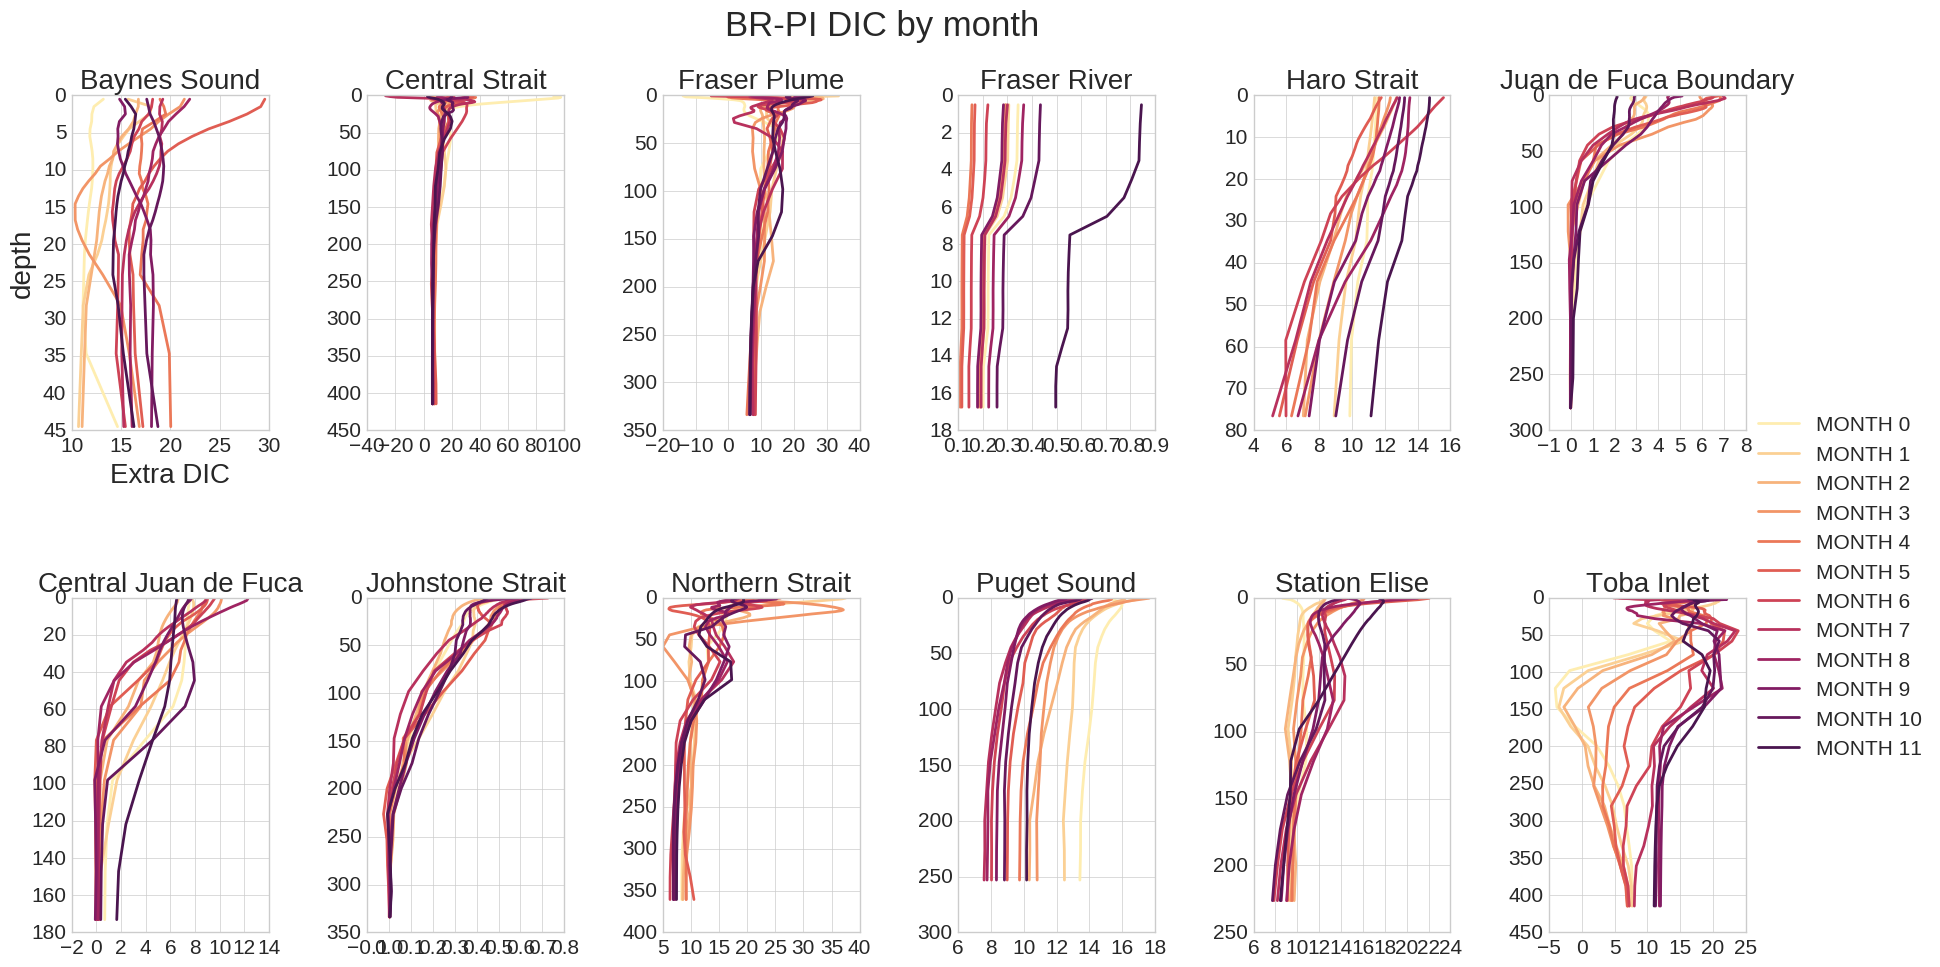

In [42]:
fname = 'DICDIFF_plots.png'

fact = 1.2                               
    
fig, axs = plt.subplots(2,6, figsize=(18*fact, 9*fact), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

for i in range(12):
    tstn = stn[i]
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean'][:]
    mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean'][:]
    mon_DIC_mean_diff = mon_DIC_BR_mean - mon_DIC_PI_mean
    
    #axs[i].contourf(np.random.rand(10,10),5,cmap=cm.cm.deep)
    axs[i].invert_yaxis()
    for m in range(12):
        axs[i].plot(mon_DIC_mean_diff[m,:],prof_depth, linewidth = 2, color = cm.cm.matter((m/12)), label = 'MONTH '+str(m))
        axs[i].set_title(cs.STATIONS[tstn]['fullname'], fontsize = 20)
        if i ==11:
            axs[i].legend(bbox_to_anchor=[1.99, 1.6], fontsize = 15)
        if i == 0:
            axs[i].set_ylabel('depth', fontsize = 20)
            axs[i].set_xlabel('Extra DIC', fontsize = 20)
    axs[i].tick_params(axis='both', which='major', labelsize=15)
                   
plt.suptitle('BR-PI DIC by month', fontsize = 25)
fig.savefig(fname)

In [33]:
cs.STATIONS[tstn]['fullname']

'Toba Inlet'

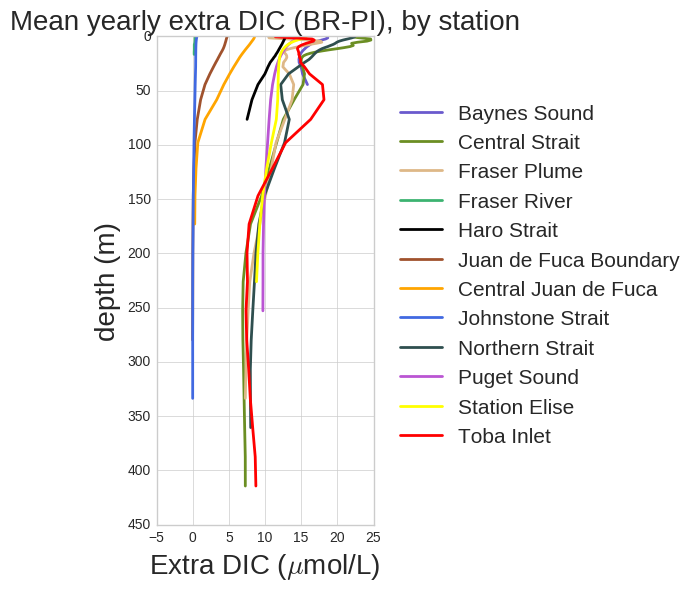

In [63]:
fact = 0.7  
fig, axs = plt.subplots(1,1, figsize=(4*fact, 9*fact), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs.invert_yaxis()
for i in range(12):
    tstn = stn[i]
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean'][:]
    mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean'][:]
    mon_DIC_mean_diff = mon_DIC_BR_mean - mon_DIC_PI_mean
    avg_DIC_diff = np.nanmean(mon_DIC_mean_diff,axis = 0)
    axs.plot(avg_DIC_diff,prof_depth, linewidth = 2, color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname'])

axs.set_title('Mean yearly extra DIC (BR-PI), by station', fontsize = 20)

axs.legend(bbox_to_anchor=[2.5, 0.9], fontsize = 15)

axs.set_ylabel('depth (m)', fontsize = 20)
axs.set_xlabel('Extra DIC ($\mu$mol/L)', fontsize = 20)
#axs.tick_params(axis='both', which='major', labelsize=15)


fig.savefig(fname)

## DIC and TA and OmA



OmA_pH_plots_stn_BS_MON_1-3-7.png
Depth of stn BS is 44.517723083496094
We are plotting months 1, 3, 7
OmA_pH_plots_stn_CS_MON_1-3-7.png
Depth of stn CS is 414.5340881347656
We are plotting months 1, 3, 7
OmA_pH_plots_stn_FP_MON_1-3-7.png
Depth of stn FP is 333.75018310546875
We are plotting months 1, 3, 7
OmA_pH_plots_stn_FR_MON_1-3-7.png
Depth of stn FR is 16.761173248291016
We are plotting months 1, 3, 7
OmA_pH_plots_stn_HS_MON_1-3-7.png
Depth of stn HS is 76.58558654785156
We are plotting months 1, 3, 7
OmA_pH_plots_stn_JDFB_MON_1-3-7.png
Depth of stn JDFB is 279.9345397949219
We are plotting months 1, 3, 7
OmA_pH_plots_stn_JDFC_MON_1-3-7.png
Depth of stn JDFC is 173.11448669433594
We are plotting months 1, 3, 7
OmA_pH_plots_stn_JS_MON_1-3-7.png
Depth of stn JS is 333.75018310546875
We are plotting months 1, 3, 7
OmA_pH_plots_stn_NS_MON_1-3-7.png
Depth of stn NS is 360.6745300292969
We are plotting months 1, 3, 7
OmA_pH_plots_stn_PS_MON_1-3-7.png
Depth of stn PS is 253.066635131835

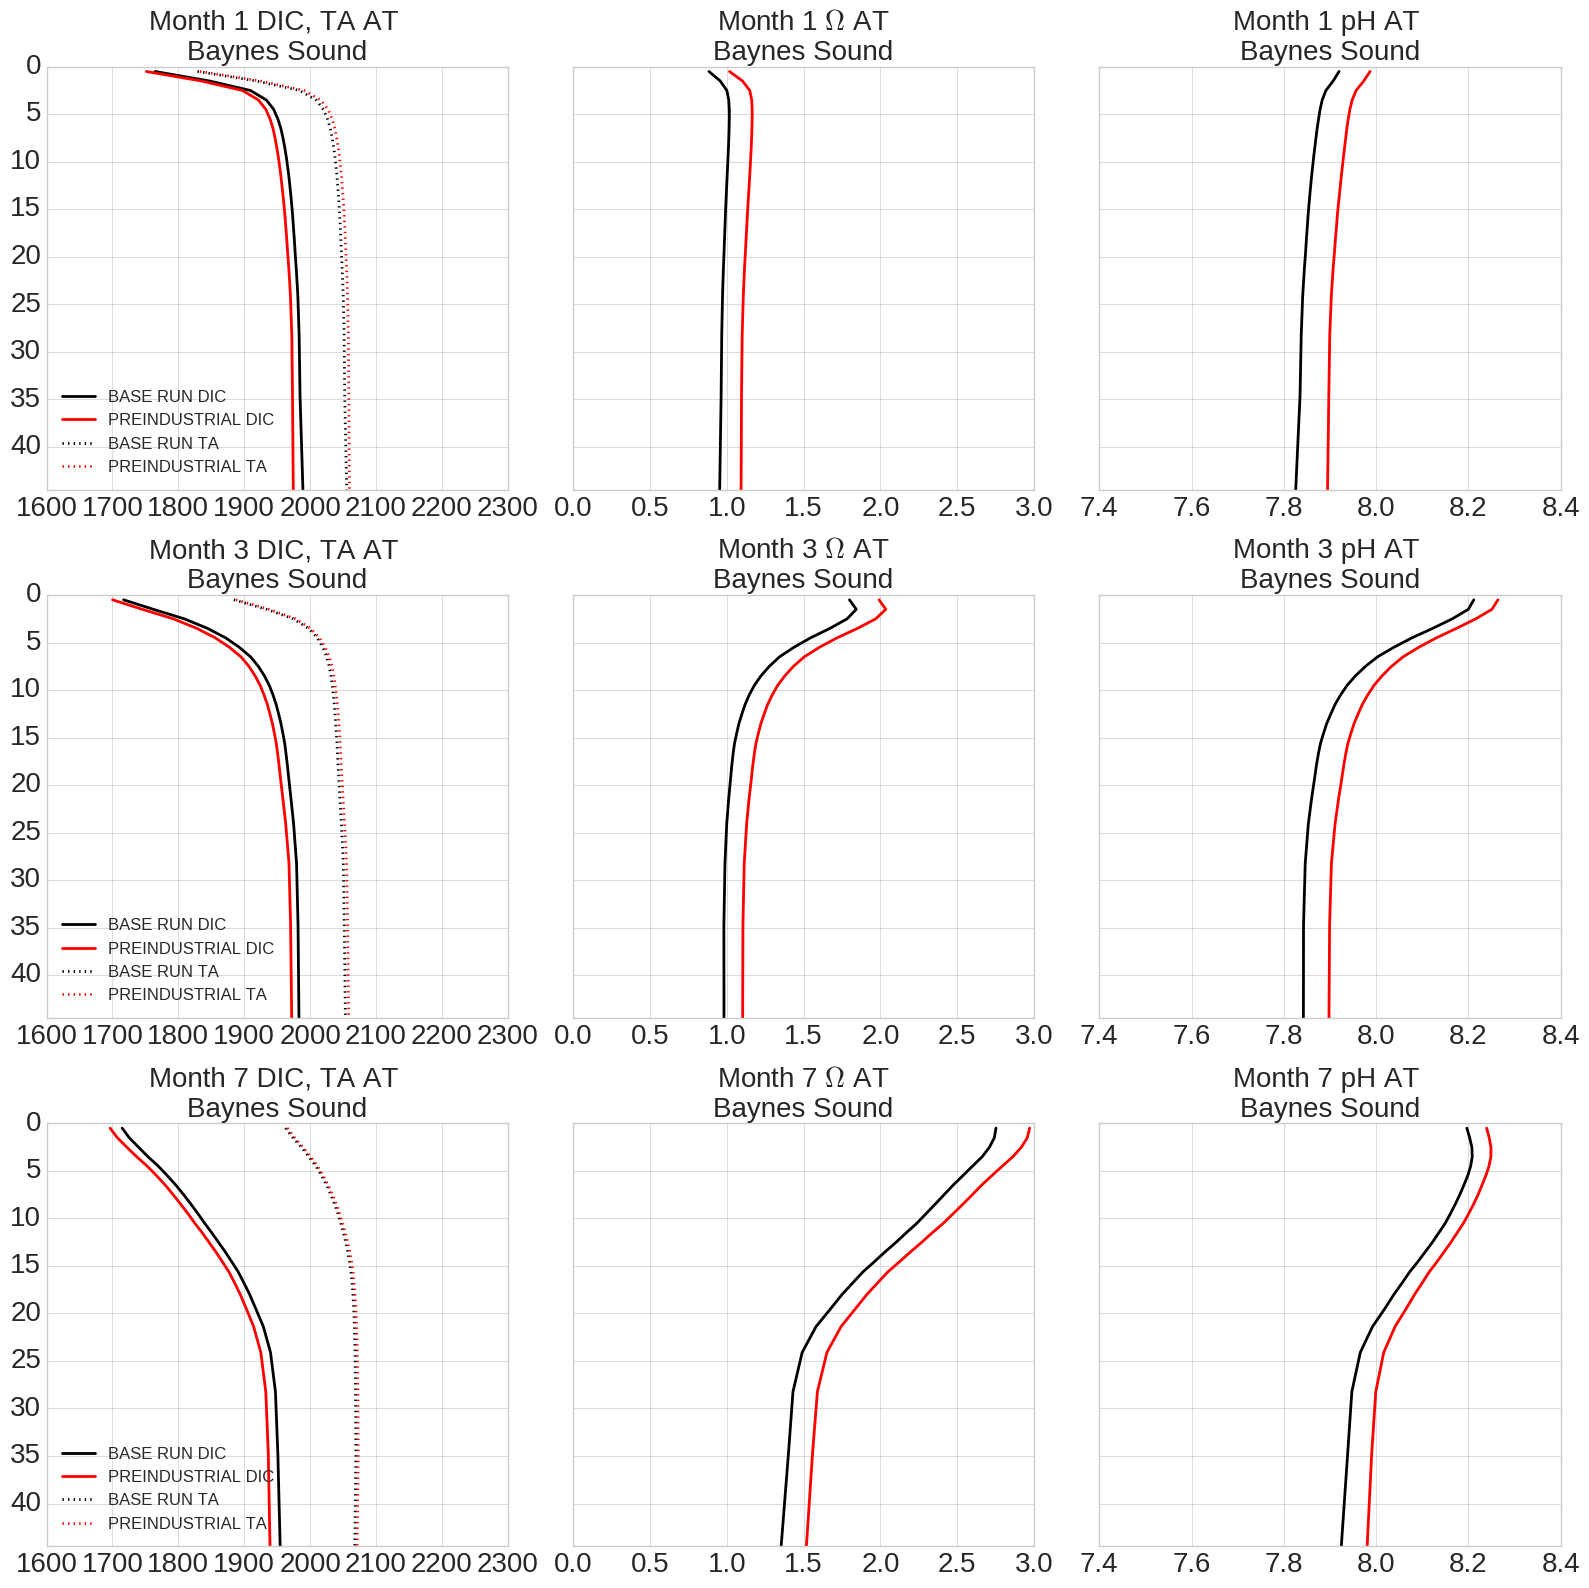

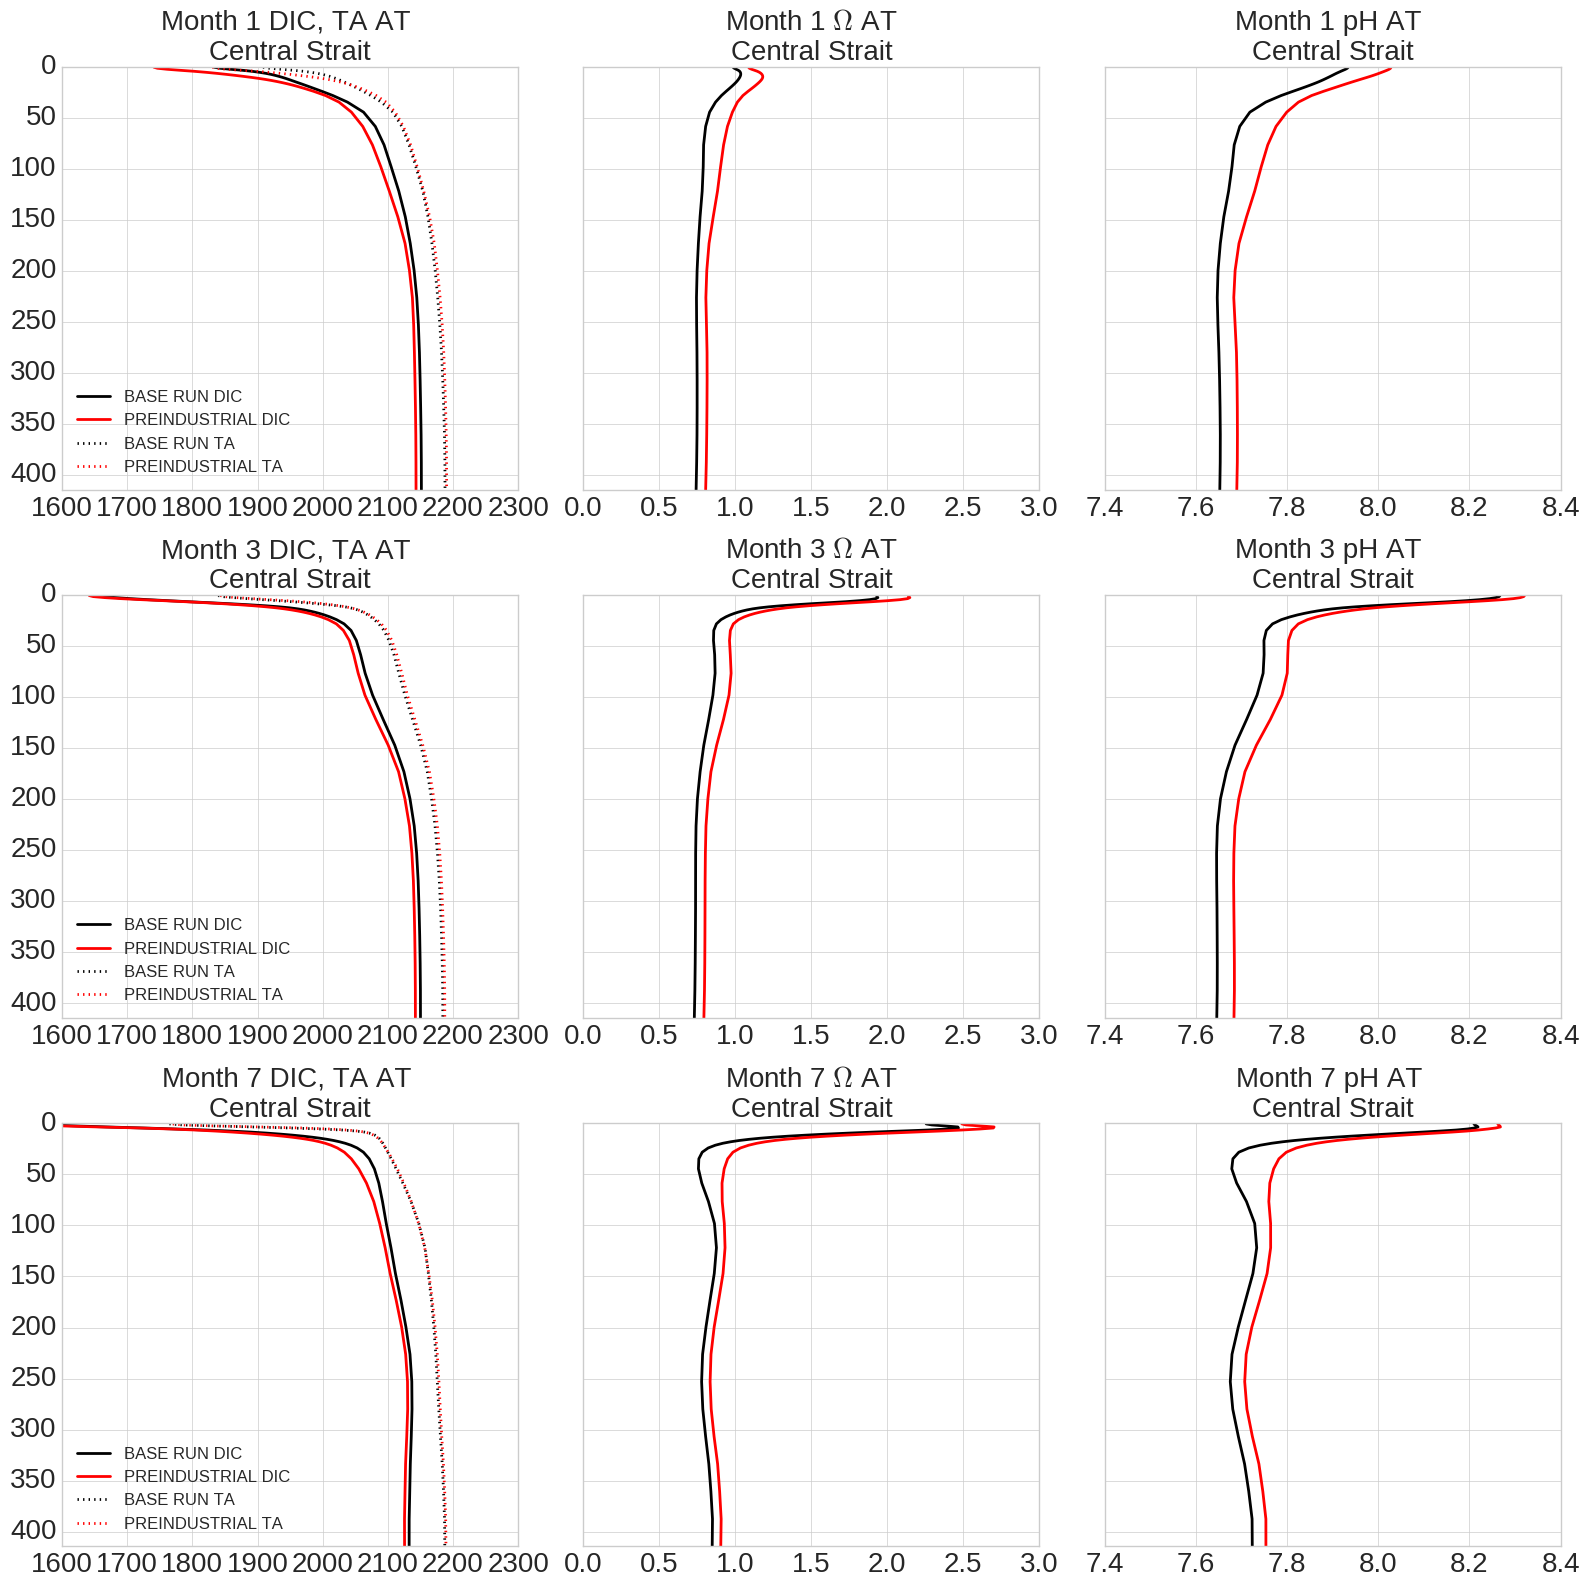

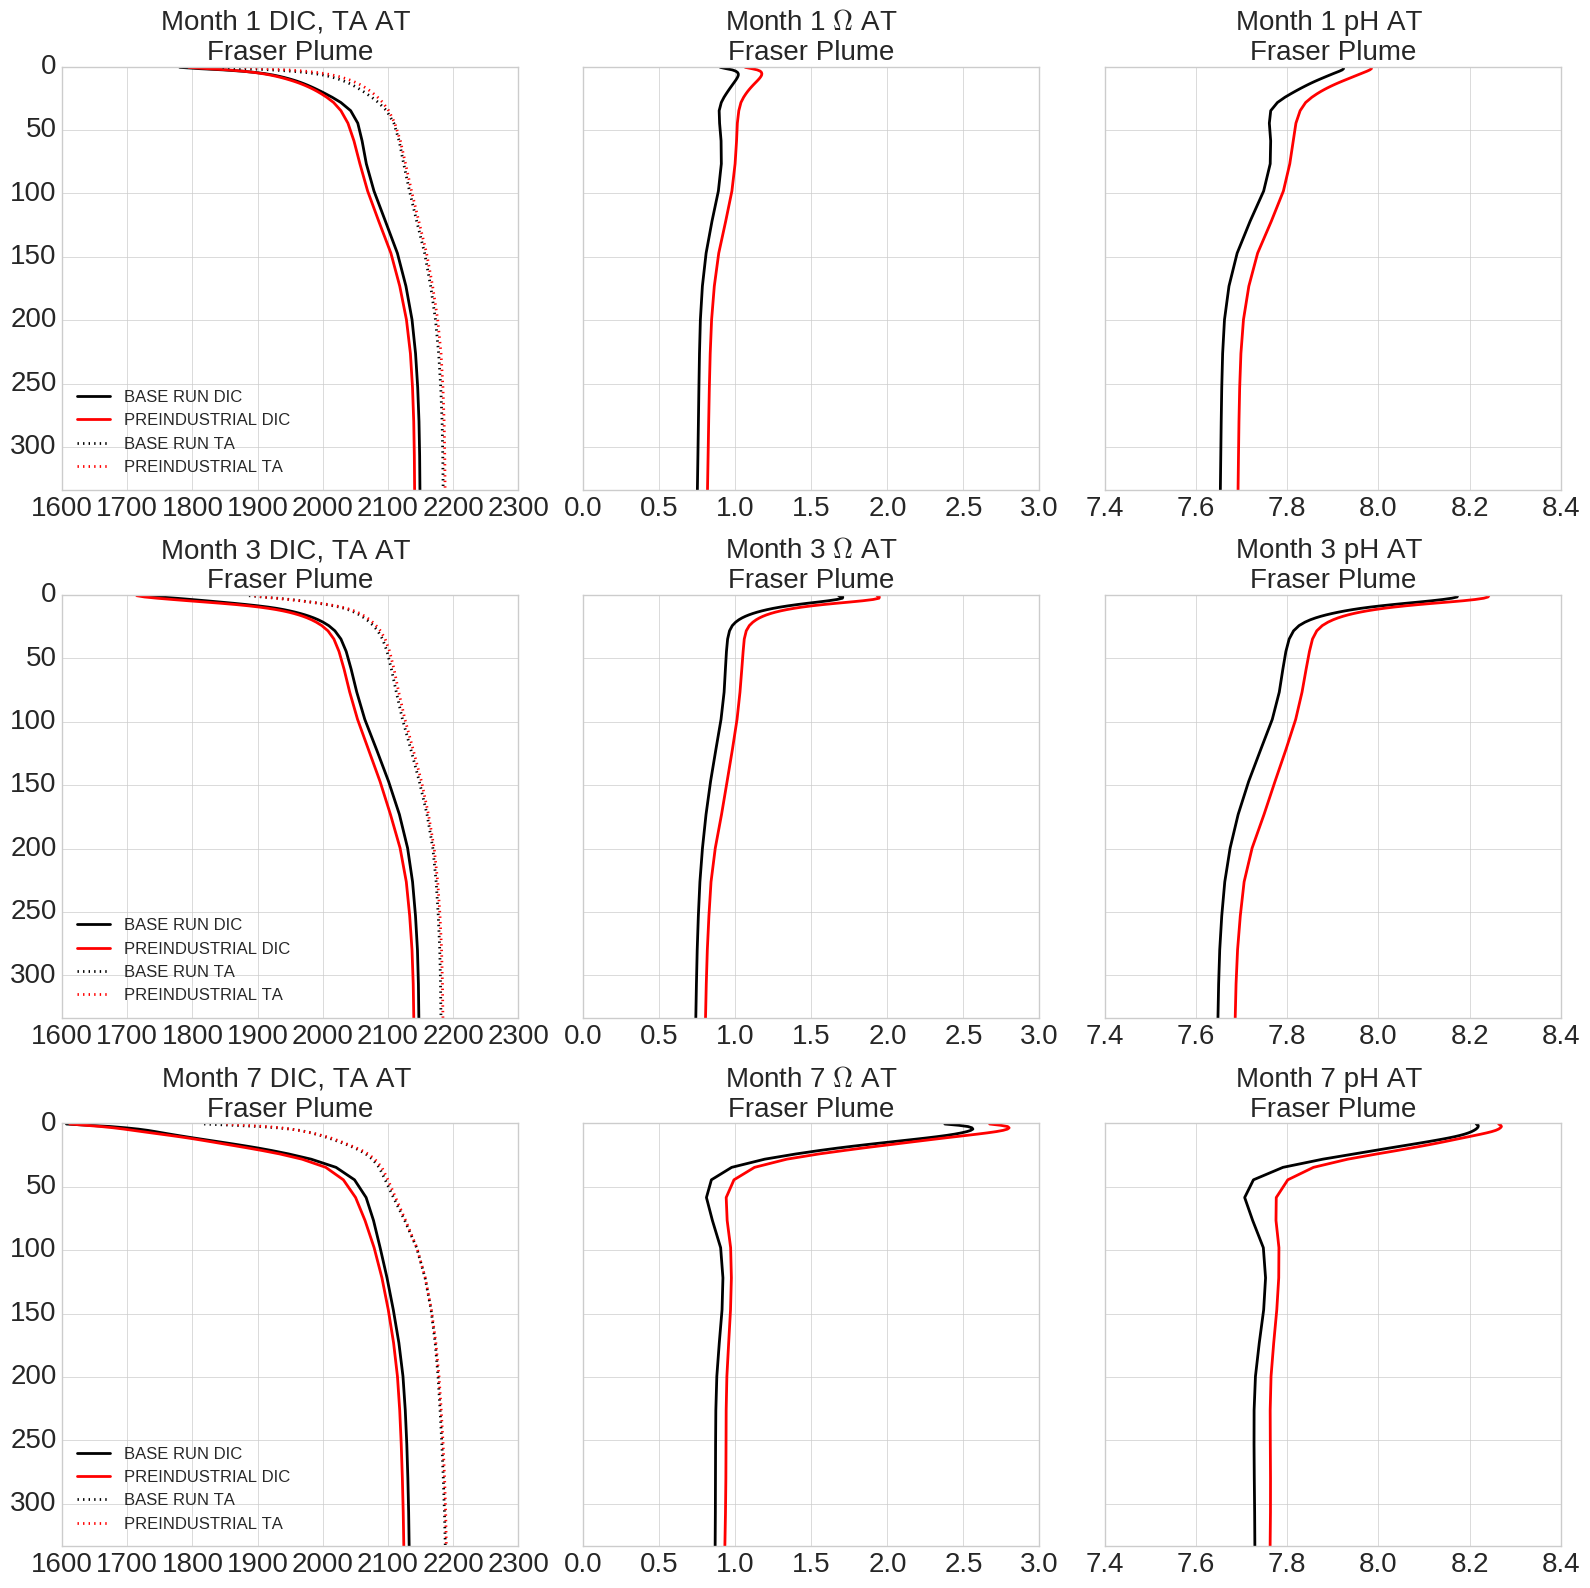

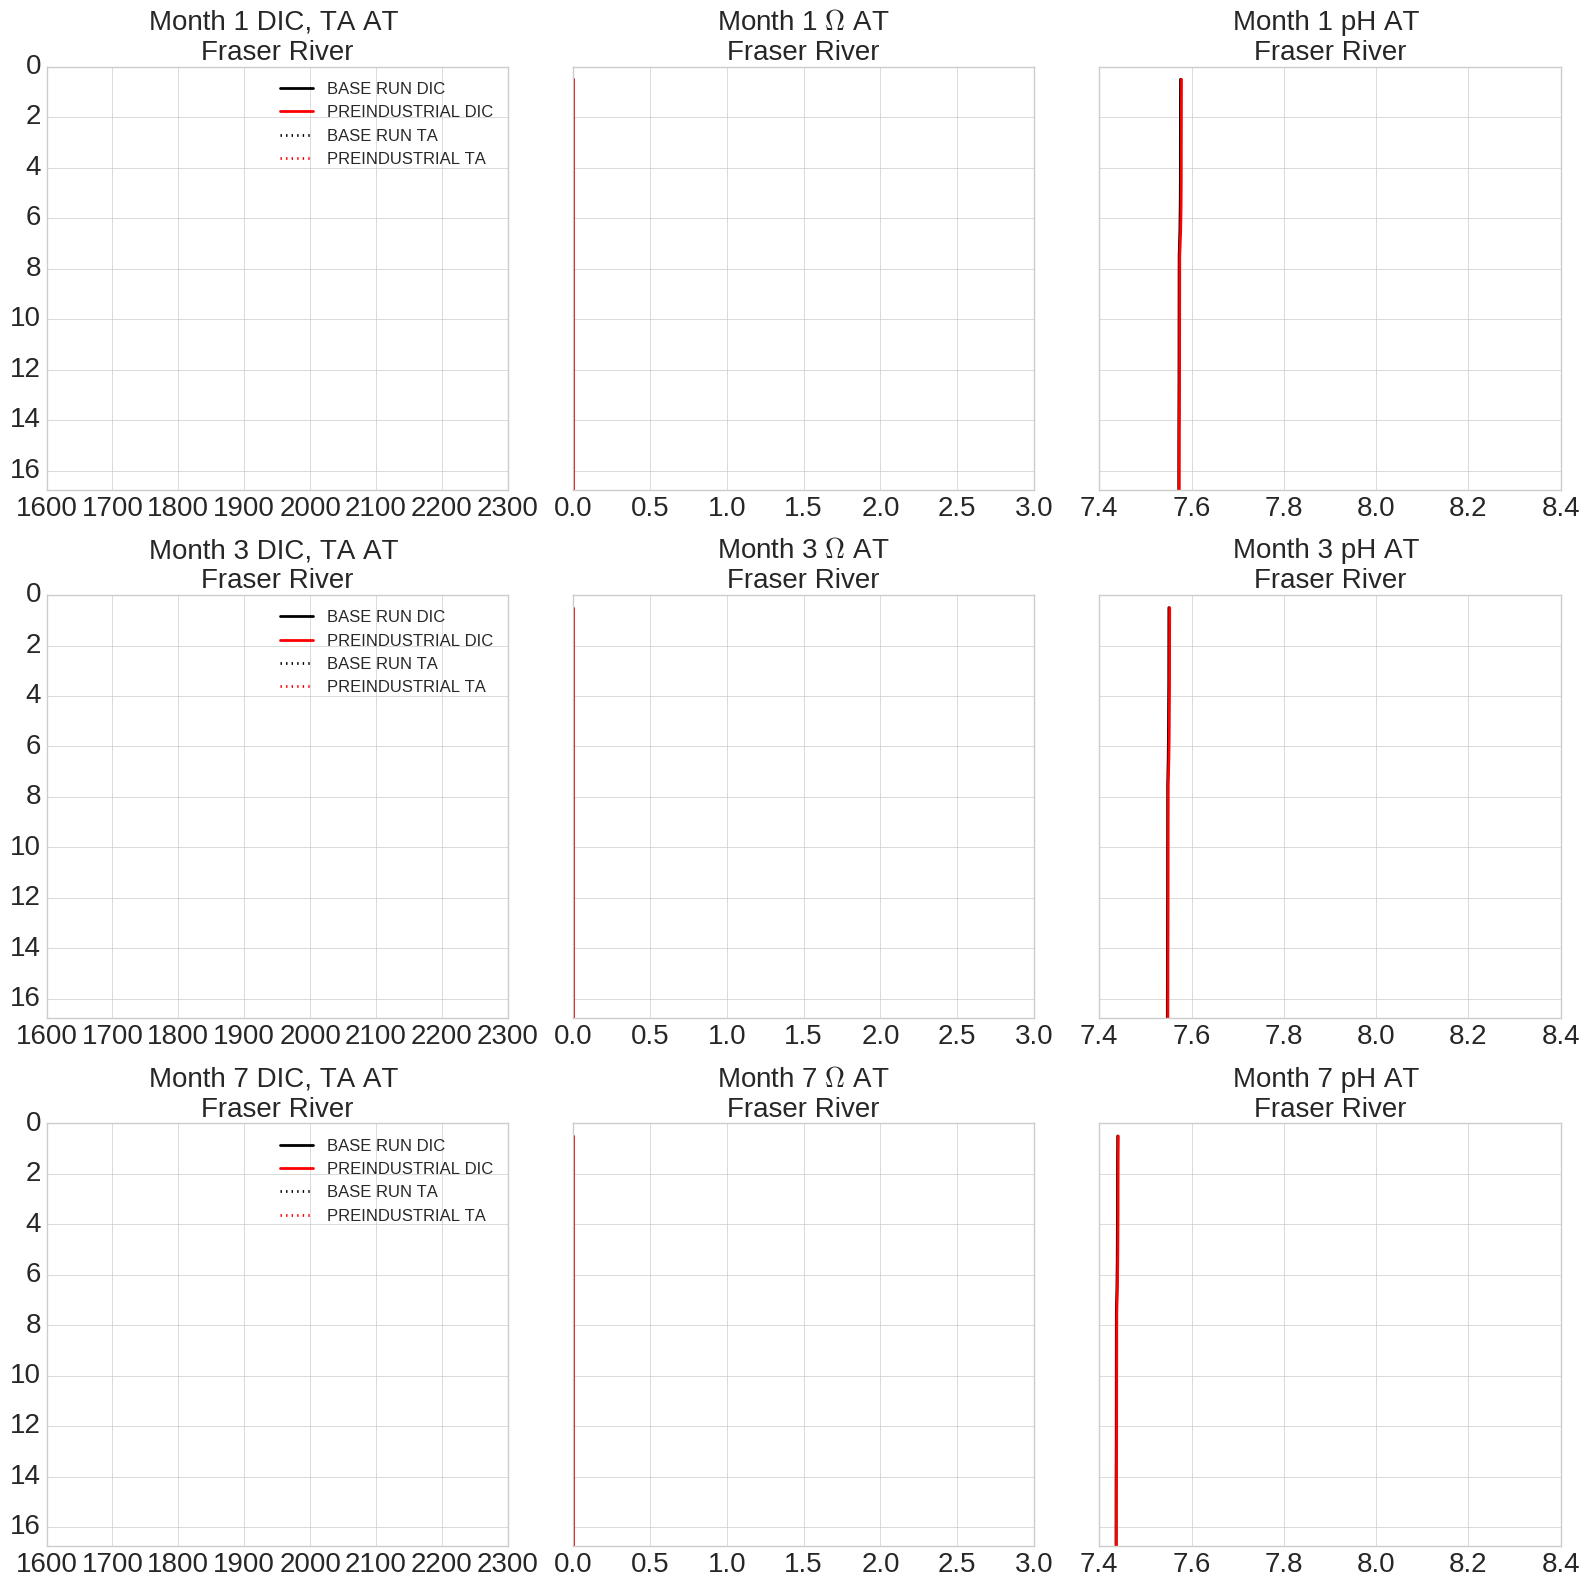

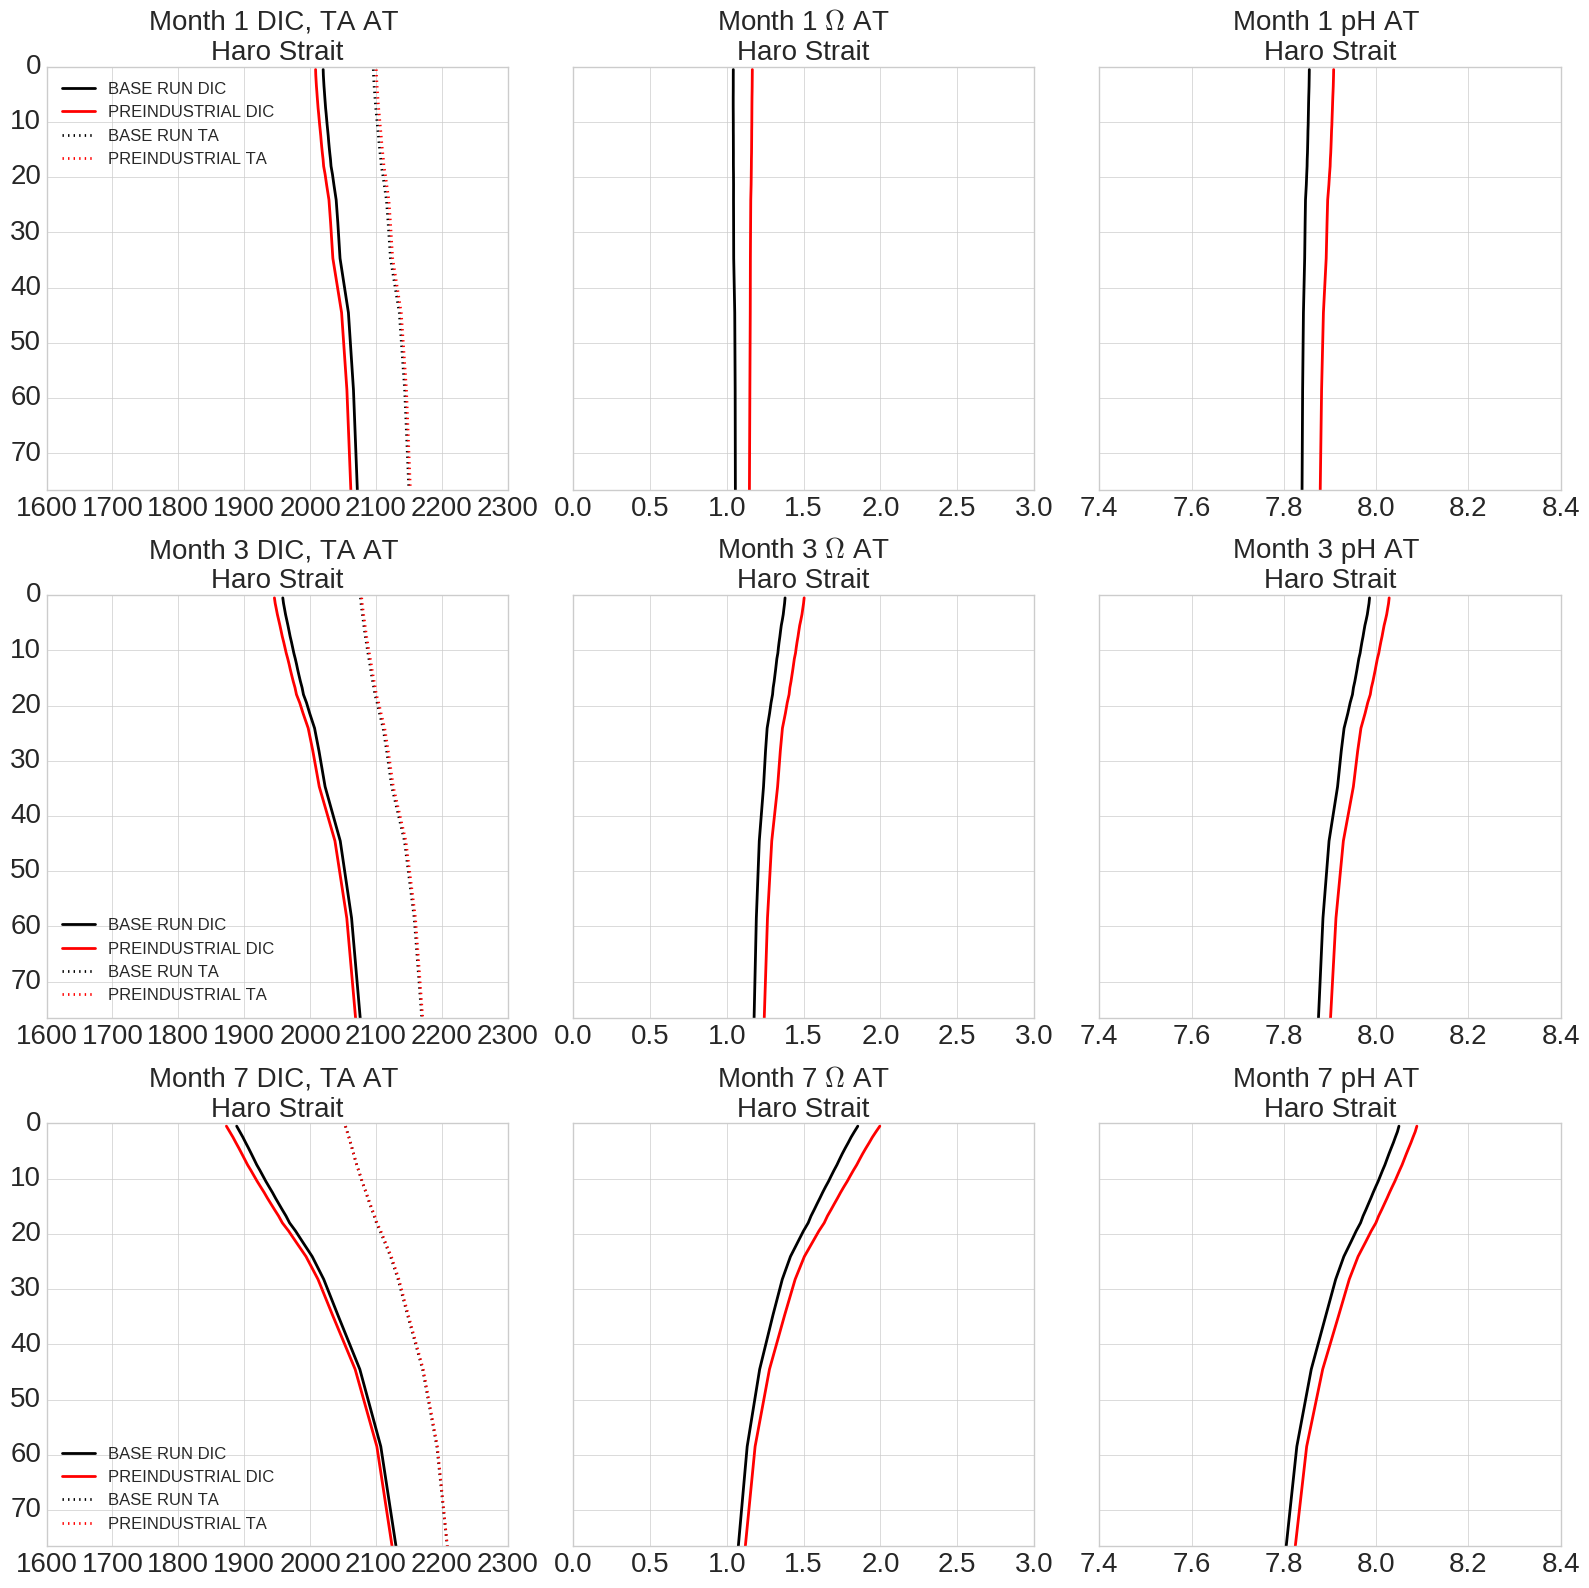

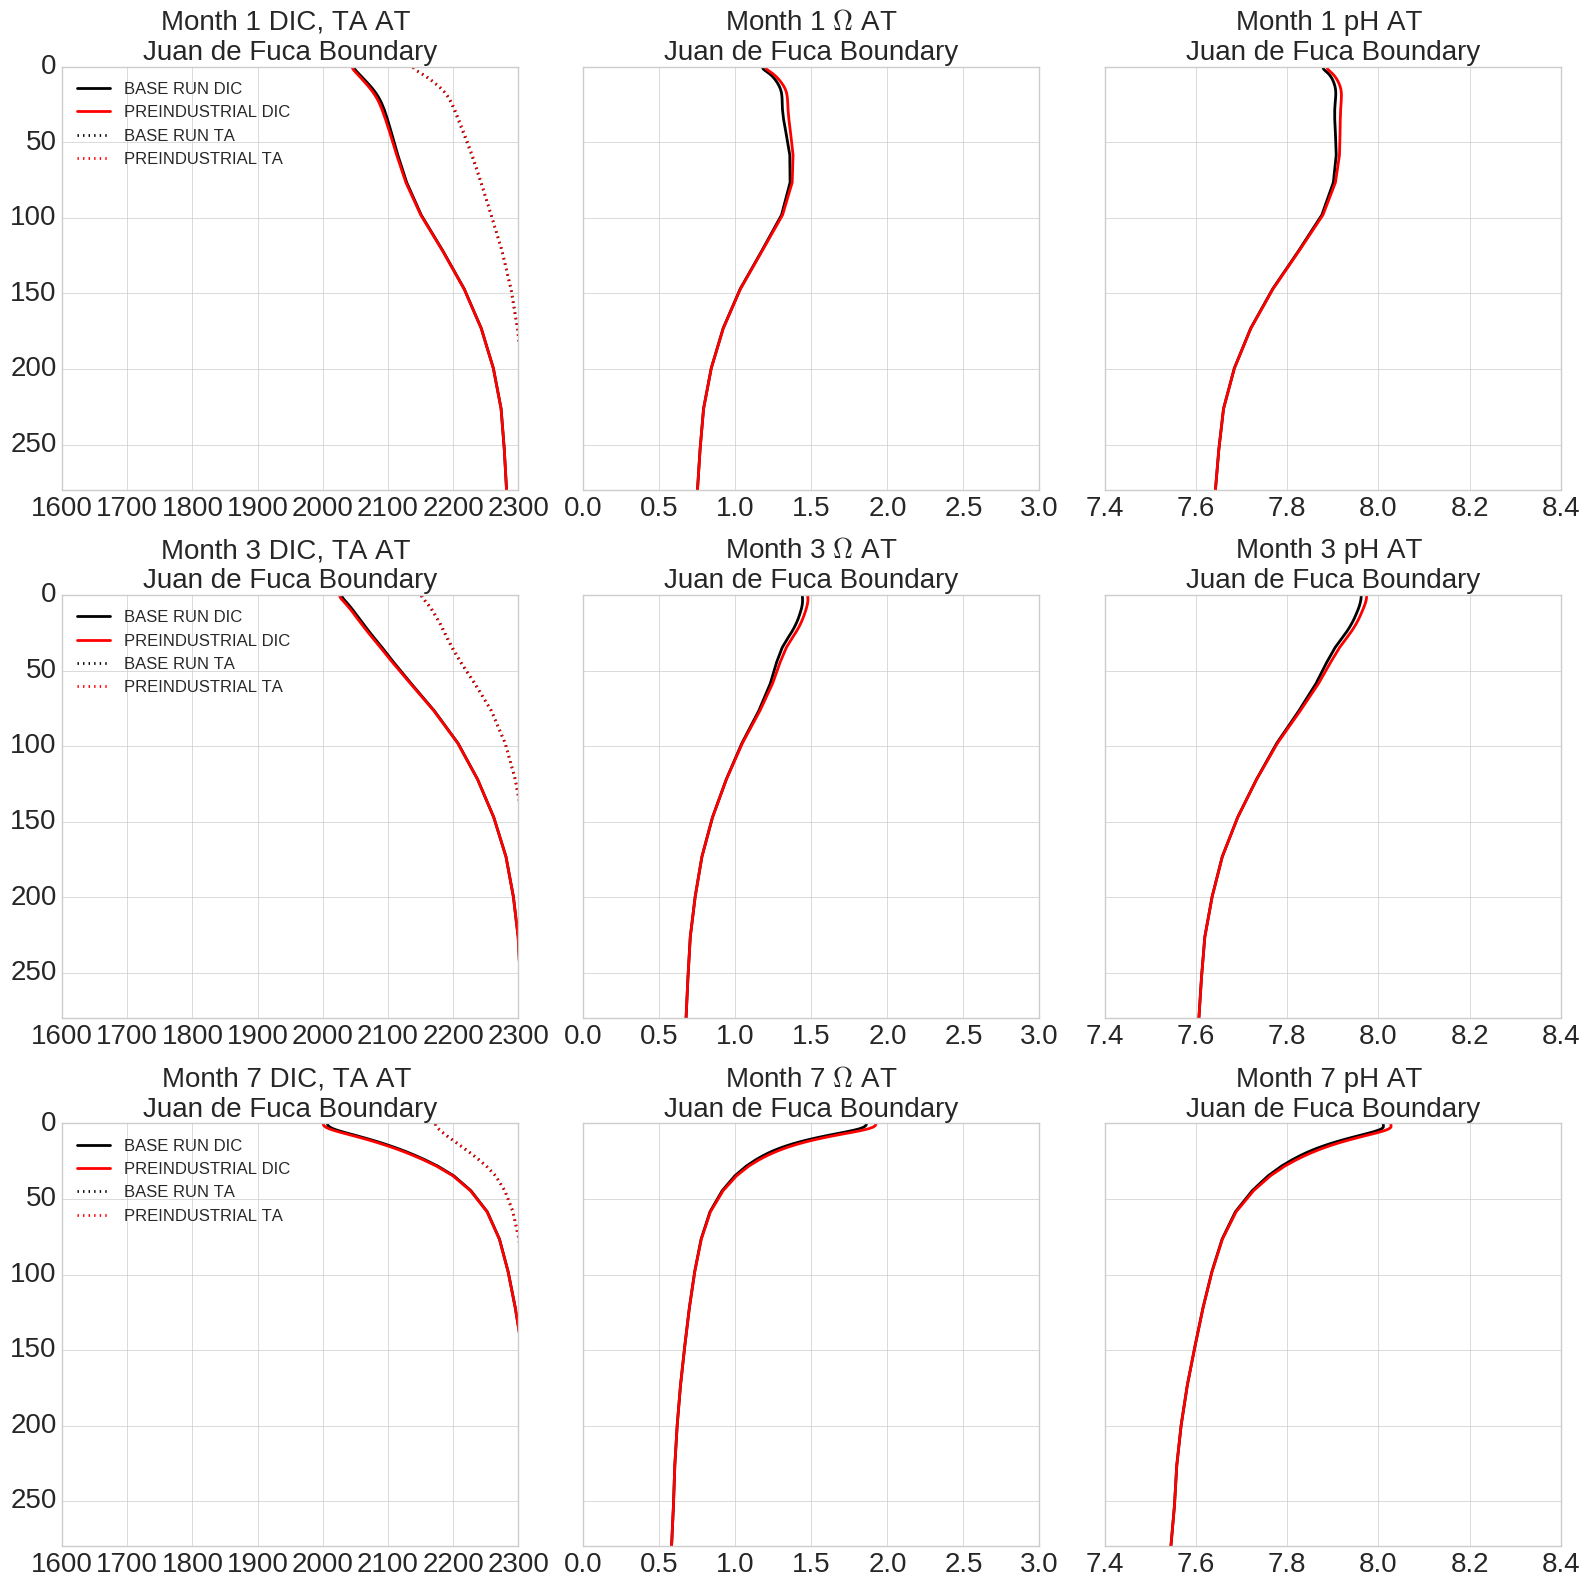

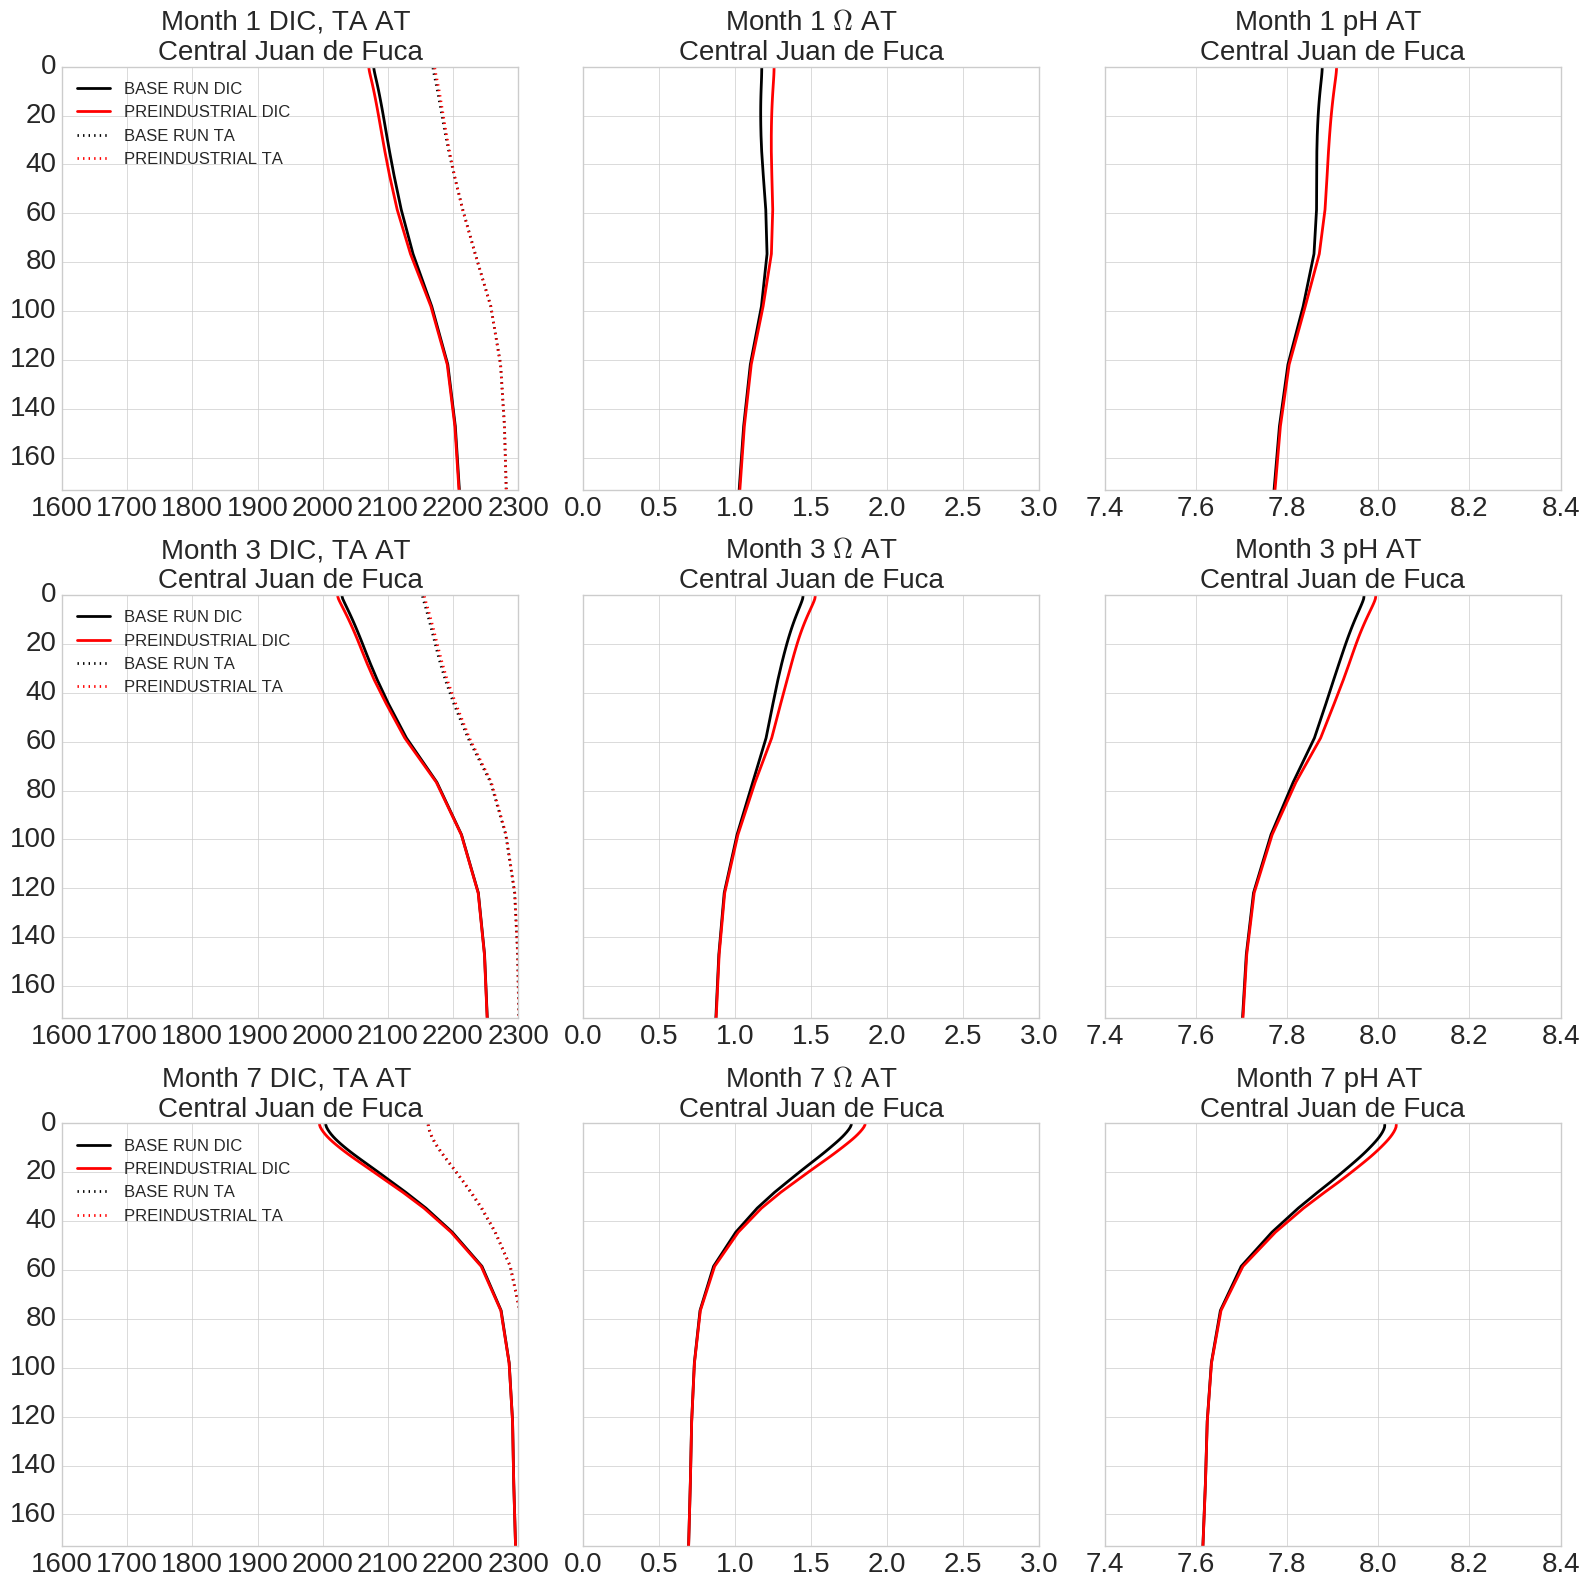

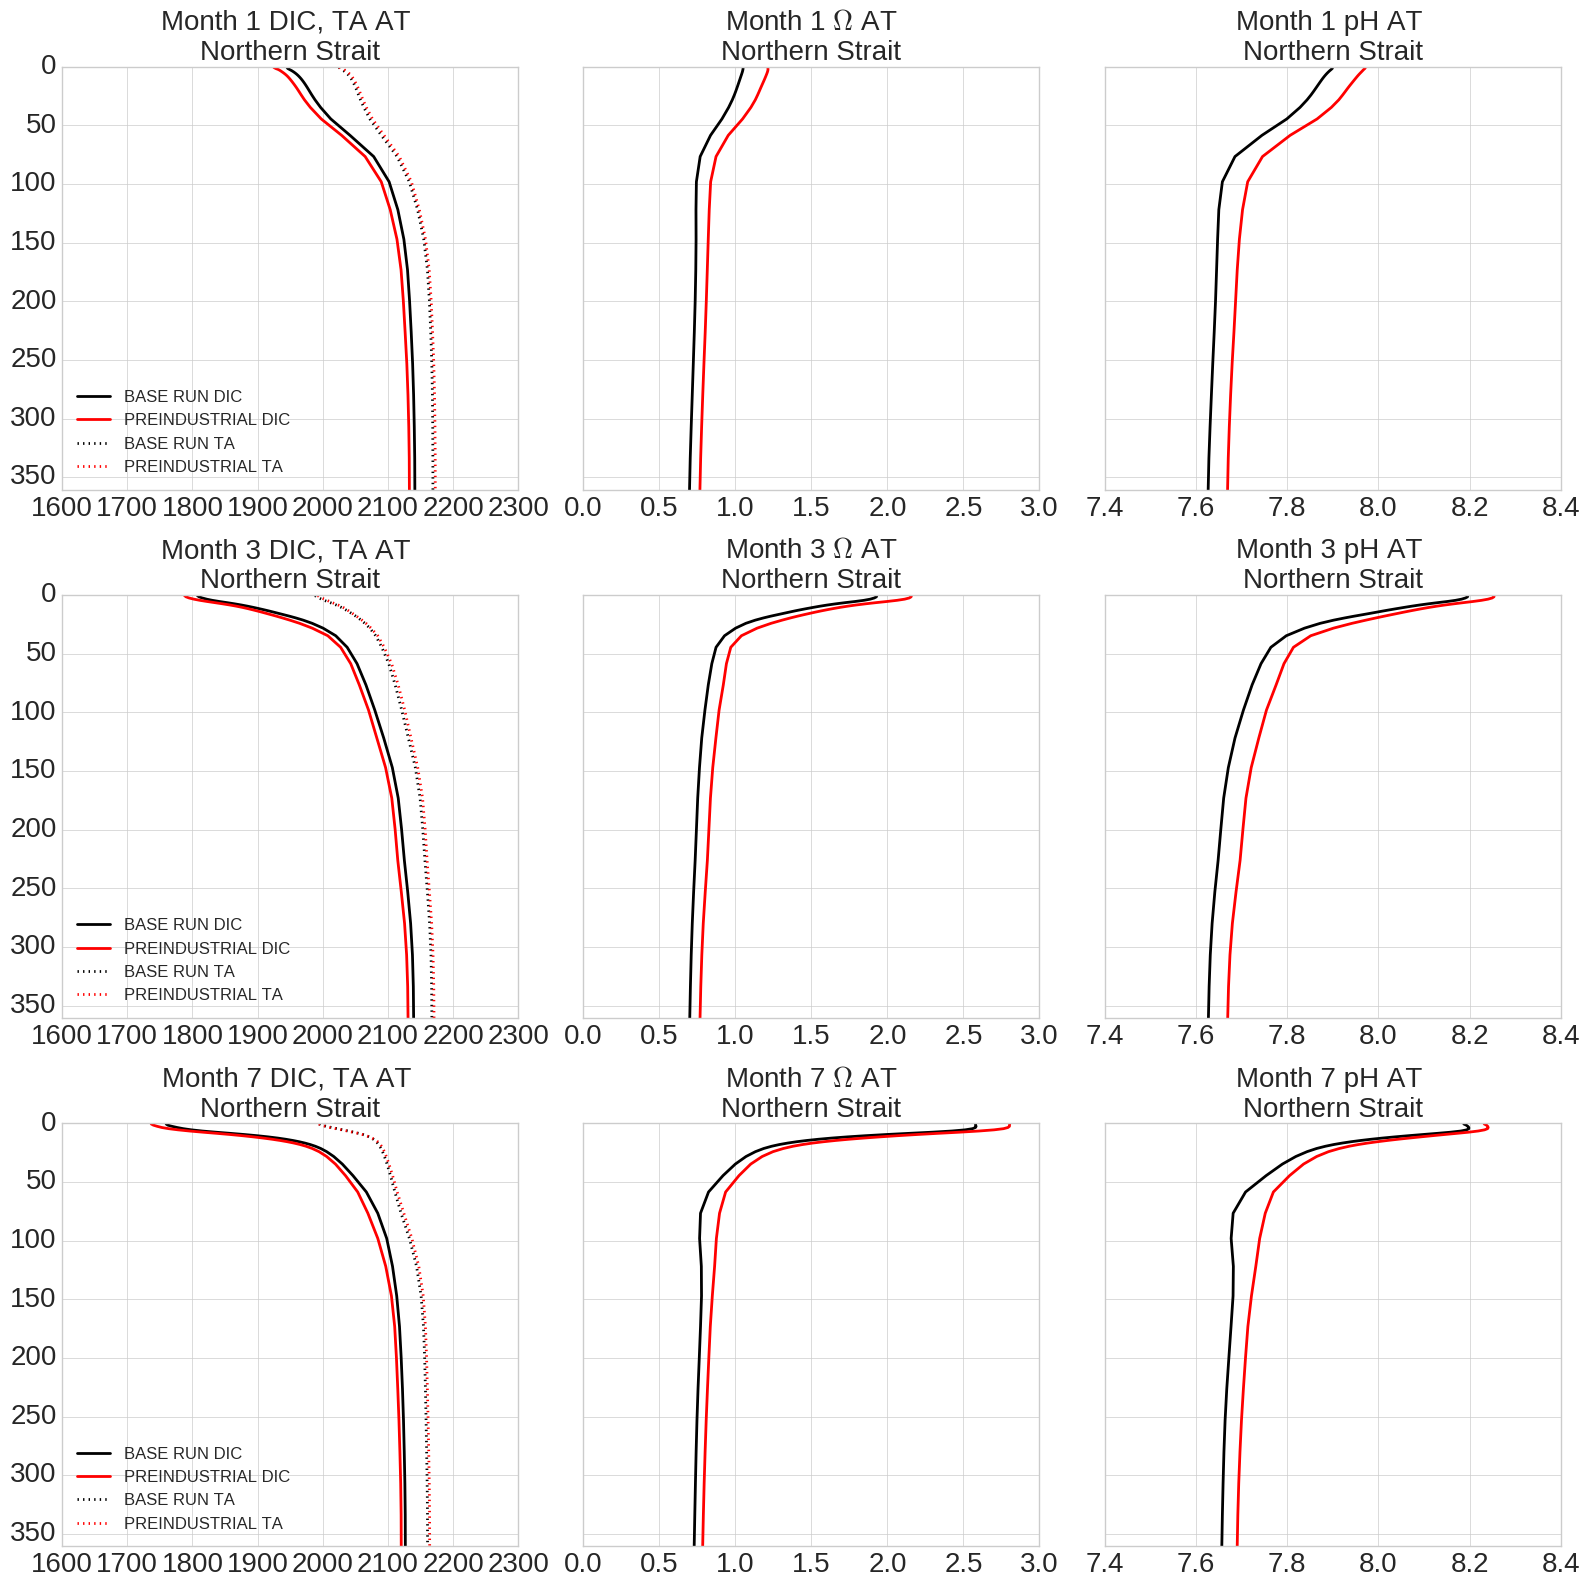

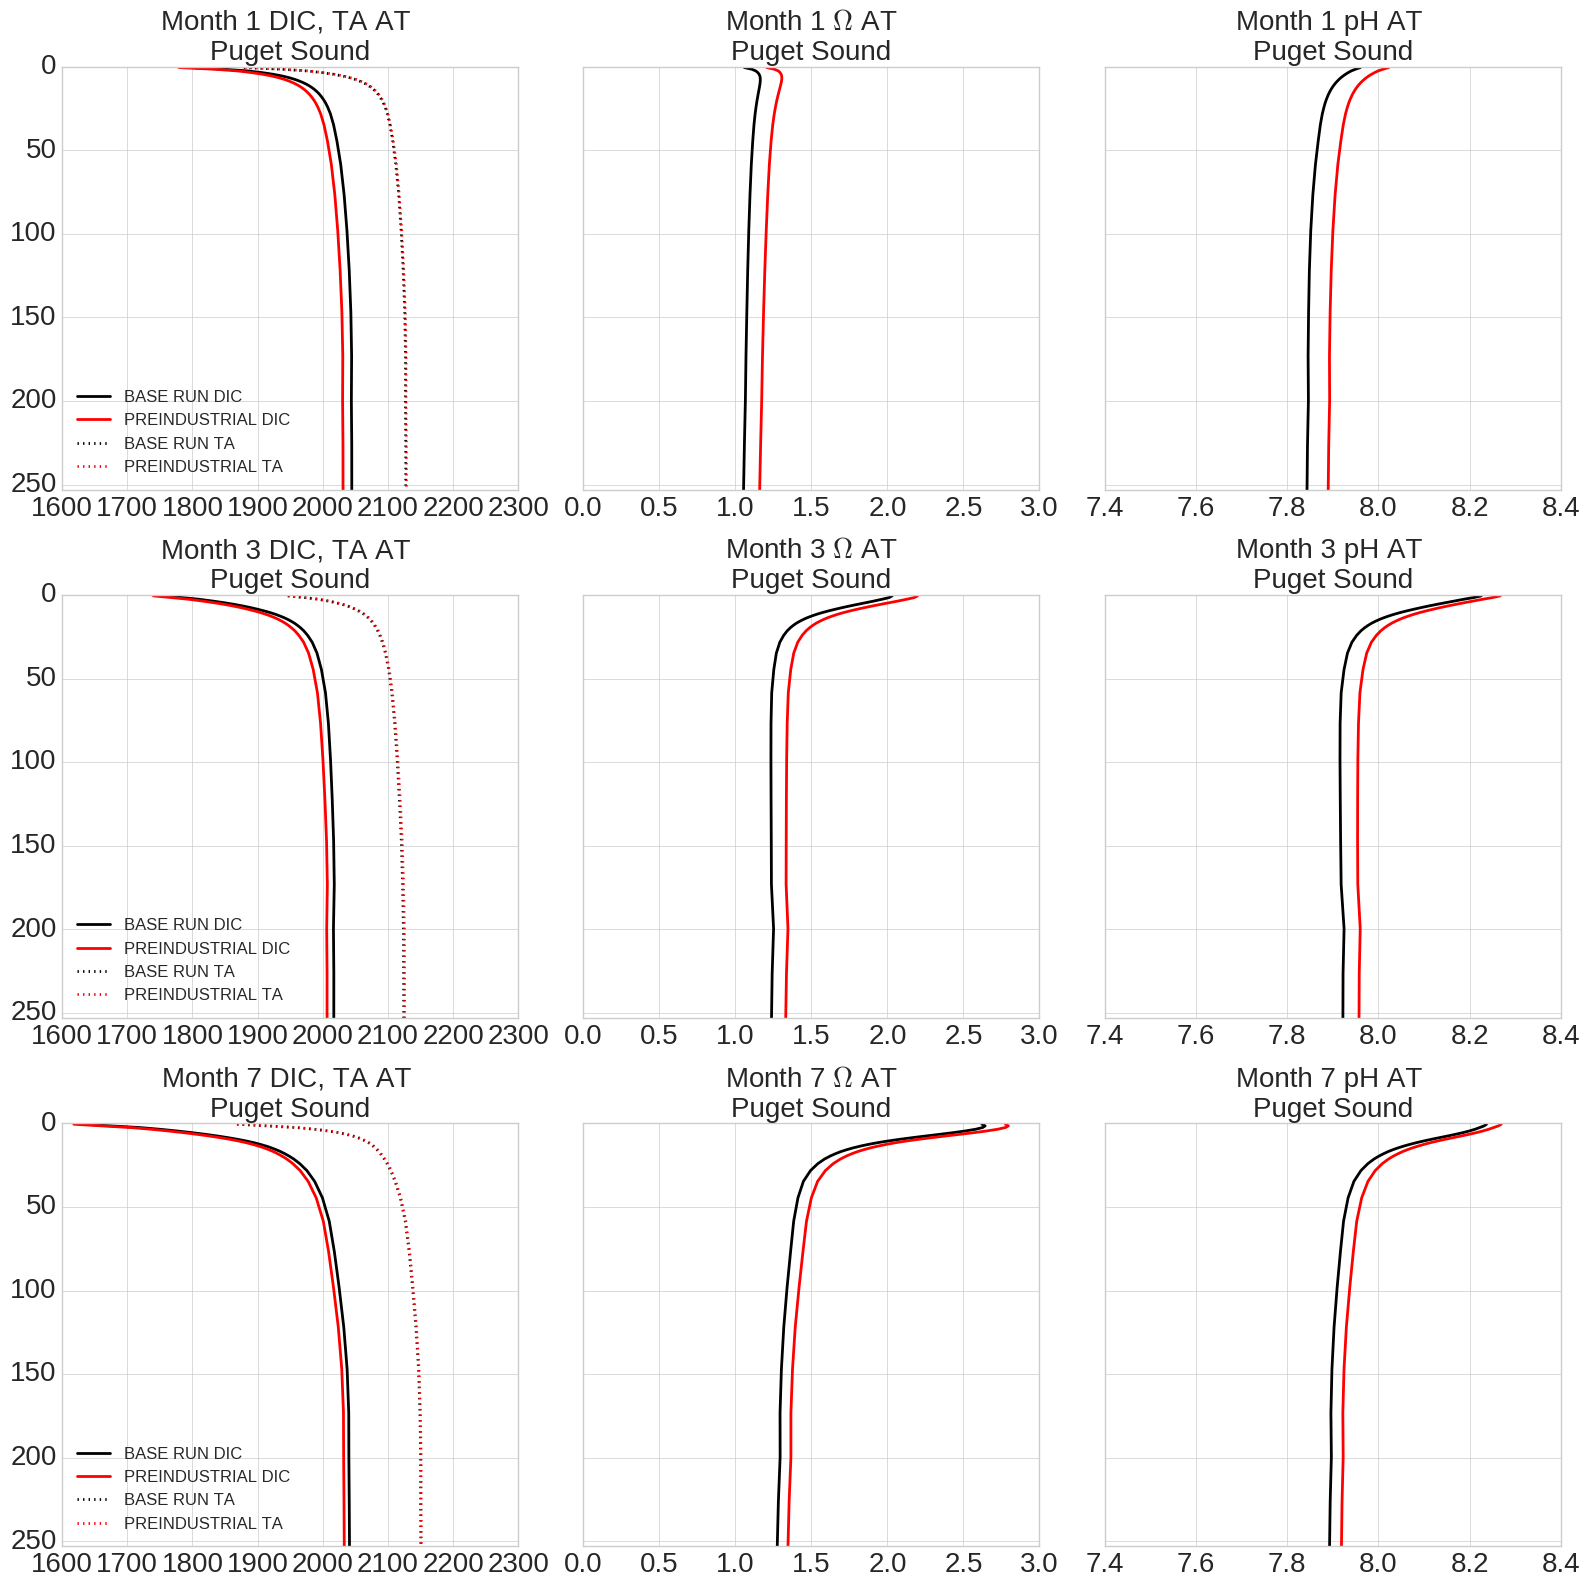

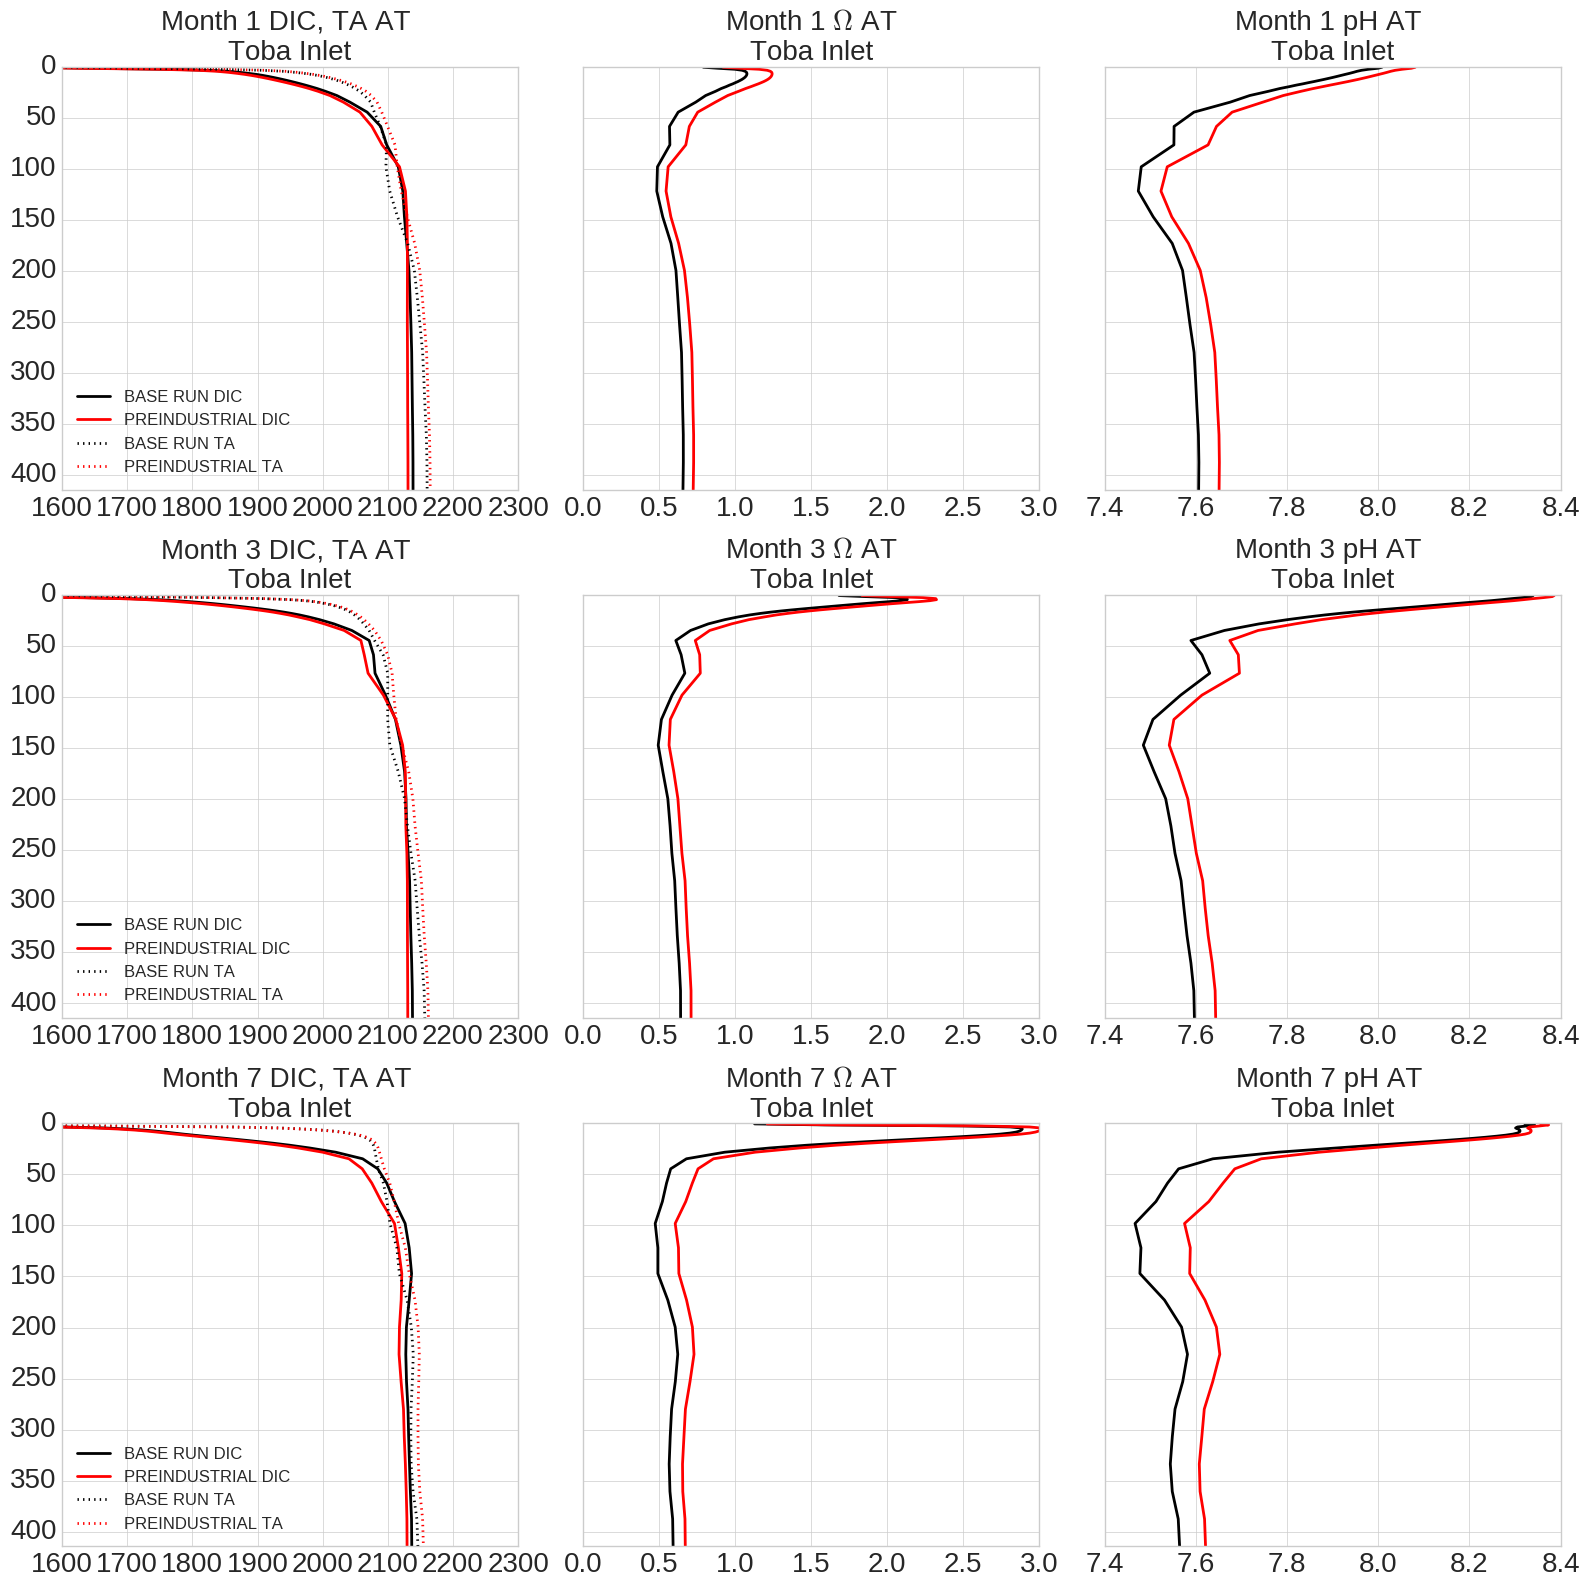

In [132]:
for s in range(12):
    tstn = stn[s]
    fname = 'OmA_pH_plots_stn_' + tstn + '_MON_' + str(mon1) + '-' + str(mon2) + '-' + str(mon3) +'.png'
    xmin = 1600
    xmax = 2300
    ymin = 0
    print(fname)
    w2 = stn.index(tstn)
    tdepth = stn_depths[w2]
    print('Depth of stn ' + tstn + ' is '+ str(tdepth))
    mon1 = 1
    mon2 = 3
    mon3 = 7
    print('We are plotting months '+str(mon1)+', '+str(mon2)+', '+str(mon3))
    ymax = tdepth

    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
    mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
    mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
    mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
    mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
    mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
    mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
    mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']


    fig, ((ax, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) \
    = plt.subplots(3, 3, figsize=(16, 16), sharey=True)

    ax.invert_yaxis()
    ax.plot(mon_DIC_BR_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN DIC') 
    ax.plot(mon_DIC_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL DIC') 
    ax.plot(mon_TA_BR_mean[mon1-1],prof_depth,linewidth = 2, linestyle=':',color = 'k', label = 'BASE RUN TA') 
    ax.plot(mon_TA_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle=':',color = 'r', label = 'PREINDUSTRIAL TA') 
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymax,ymin])
    ax4.set_xlim([xmin,xmax])
    ax4.set_ylim([ymax,ymin])
    ax7.set_xlim([xmin,xmax])
    ax7.set_ylim([ymax,ymin])
    ax.set_title('Month ' + str(mon1) + ' DIC, TA AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
    ax.legend(fontsize = 25, loc = 'best')
    ax.tick_params(axis='both', which='major', labelsize=20)

    #oma
    tsra = np.ravel(mon_sal_BR_mean[mon1-1])
    ttera = np.ravel(mon_temp_BR_mean[mon1-1])
    tdra = np.ravel(mon_DIC_BR_mean[mon1-1]) * 1e-3
    ttara =  np.ravel(mon_TA_BR_mean[mon1-1]) * 1e-3
    tdepthra = np.ravel(prof_depth)
    tpressure = np.zeros_like(prof_depth)
    tpressure[:] =1
    tzero = tdepthra * 0 

    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH_BR,pco2,fco2,co2,hco3,co3,OmegaA_BR,OmegaC,BetaD,DENis,p,Tis = response_tup

    tsra = np.ravel(mon_sal_PI_mean[mon1-1])
    ttera = np.ravel(mon_temp_PI_mean[mon1-1])
    tdra = np.ravel(mon_DIC_PI_mean[mon1-1]) * 1e-3
    ttara =  np.ravel(mon_TA_PI_mean[mon1-1]) * 1e-3
    tdepthra = np.ravel(prof_depth)
    tpressure = np.zeros_like(prof_depth)
    tpressure[:] =1
    tzero = tdepthra * 0 

    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH_PI,pco2,fco2,co2,hco3,co3,OmegaA_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

    OmegaA_BR[OmegaA_BR>1e10] = np.nan
    OmegaA_PI[OmegaA_PI>1e10] = np.nan
    pH_BR[pH_BR>1e10] = np.nan
    pH_PI[pH_PI>1e10] = np.nan
    ax2.plot(OmegaA_BR,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN $\Omega$') 
    ax2.plot(OmegaA_PI,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PI RUN $\Omega$') 
    ax2.set_title('Month ' + str(mon1) + ' $\Omega$ AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
    ax2.tick_params(axis='both', which='major', labelsize=20)

    ax.legend(loc = 'best')
    ax2.set_xlim([0,3])
    ax3.set_xlim([7.4,8.4])
    ax3.plot(pH_BR,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN $\Omega$') 
    ax3.plot(pH_PI,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PI RUN $\Omega$') 
    ax3.set_title('Month ' + str(mon1) + ' pH AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
    ax3.tick_params(axis='both', which='major', labelsize=20)

    ax4.invert_yaxis()
    ax4.plot(mon_DIC_BR_mean[mon2-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN DIC') 
    ax4.plot(mon_DIC_PI_mean[mon2-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL DIC') 
    ax4.plot(mon_TA_BR_mean[mon2-1],prof_depth,linewidth = 2, linestyle=':',color = 'k', label = 'BASE RUN TA') 
    ax4.plot(mon_TA_PI_mean[mon2-1],prof_depth,linewidth = 2, linestyle=':',color = 'r', label = 'PREINDUSTRIAL TA') 
    ax4.set_xlim([xmin,xmax])
    ax4.set_ylim([ymax,ymin])
    ax4.set_title('Month ' + str(mon2) + ' DIC, TA AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
    ax4.legend(fontsize = 20, loc = 'best')
    ax4.tick_params(axis='both', which='major', labelsize=20)

    #oma
    tsra = np.ravel(mon_sal_BR_mean[mon2-1])
    ttera = np.ravel(mon_temp_BR_mean[mon2-1])
    tdra = np.ravel(mon_DIC_BR_mean[mon2-1]) * 1e-3
    ttara =  np.ravel(mon_TA_BR_mean[mon2-1]) * 1e-3
    tdepthra = np.ravel(prof_depth)
    tpressure = np.zeros_like(prof_depth)
    tpressure[:] =1
    tzero = tdepthra * 0 

    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH_BR,pco2,fco2,co2,hco3,co3,OmegaA_BR,OmegaC,BetaD,DENis,p,Tis = response_tup

    tsra = np.ravel(mon_sal_PI_mean[mon2-1])
    ttera = np.ravel(mon_temp_PI_mean[mon2-1])
    tdra = np.ravel(mon_DIC_PI_mean[mon2-1]) * 1e-3
    ttara =  np.ravel(mon_TA_PI_mean[mon2-1]) * 1e-3
    tdepthra = np.ravel(prof_depth)
    tpressure = np.zeros_like(prof_depth)
    tpressure[:] =1
    tzero = tdepthra * 0 

    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH_PI,pco2,fco2,co2,hco3,co3,OmegaA_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

    OmegaA_BR[OmegaA_BR>1e10] = np.nan
    OmegaA_PI[OmegaA_PI>1e10] = np.nan
    pH_BR[pH_BR>1e10] = np.nan
    pH_PI[pH_PI>1e10] = np.nan
    ax5.plot(OmegaA_BR,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN $\Omega$') 
    ax5.plot(OmegaA_PI,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PI RUN $\Omega$') 
    ax5.set_title('Month ' + str(mon2) + ' $\Omega$ AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
    ax5.tick_params(axis='both', which='major', labelsize=20)

    ax4.legend(loc = 'best')
    ax5.set_xlim([0,3])

    ax6.plot(pH_BR,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN $\Omega$') 
    ax6.plot(pH_PI,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PI RUN $\Omega$') 
    ax6.set_title('Month ' + str(mon2) + ' pH AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
    ax6.tick_params(axis='both', which='major', labelsize=20)
    ax6.set_xlim([7.4,8.4])

    ax7.invert_yaxis()
    ax7.plot(mon_DIC_BR_mean[mon3-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN DIC') 
    ax7.plot(mon_DIC_PI_mean[mon3-1],prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL DIC') 
    ax7.plot(mon_TA_BR_mean[mon3-1],prof_depth,linewidth = 2, linestyle=':',color = 'k', label = 'BASE RUN TA') 
    ax7.plot(mon_TA_PI_mean[mon3-1],prof_depth,linewidth = 2, linestyle=':',color = 'r', label = 'PREINDUSTRIAL TA') 
    ax7.set_xlim([xmin,xmax])
    ax7.set_ylim([ymax,ymin])
    ax7.set_title('Month ' + str(mon3) + ' DIC, TA AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
    ax7.legend(fontsize = 20, loc = 'best')
    ax7.tick_params(axis='both', which='major', labelsize=20)

    #oma
    tsra = np.ravel(mon_sal_BR_mean[mon3-1])
    ttera = np.ravel(mon_temp_BR_mean[mon3-1])
    tdra = np.ravel(mon_DIC_BR_mean[mon3-1]) * 1e-3
    ttara =  np.ravel(mon_TA_BR_mean[mon3-1]) * 1e-3
    tdepthra = np.ravel(prof_depth)
    tpressure = np.zeros_like(prof_depth)
    tpressure[:] =1
    tzero = tdepthra * 0 

    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH_BR,pco2,fco2,co2,hco3,co3,OmegaA_BR,OmegaC,BetaD,DENis,p,Tis = response_tup

    tsra = np.ravel(mon_sal_PI_mean[mon3-1])
    ttera = np.ravel(mon_temp_PI_mean[mon3-1])
    tdra = np.ravel(mon_DIC_PI_mean[mon3-1]) * 1e-3
    ttara =  np.ravel(mon_TA_PI_mean[mon3-1]) * 1e-3
    tdepthra = np.ravel(prof_depth)
    tpressure = np.zeros_like(prof_depth)
    tpressure[:] =1
    tzero = tdepthra * 0 

    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH_PI,pco2,fco2,co2,hco3,co3,OmegaA_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

    OmegaA_BR[OmegaA_BR>1e10] = np.nan
    OmegaA_PI[OmegaA_PI>1e10] = np.nan
    pH_BR[pH_BR>1e10] = np.nan
    pH_PI[pH_PI>1e10] = np.nan
    ax8.plot(OmegaA_BR,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN $\Omega$') 
    ax8.plot(OmegaA_PI,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PI RUN $\Omega$') 
    ax8.set_title('Month ' + str(mon3) + ' $\Omega$ AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
    ax8.tick_params(axis='both', which='major', labelsize=20)

    ax7.legend(loc = 'best')
    ax8.set_xlim([0,3])
    ax9.set_xlim([7.4,8.4])
    ax9.plot(pH_BR,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN $\Omega$') 
    ax9.plot(pH_PI,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PI RUN $\Omega$') 
    ax9.set_title('Month ' + str(mon3) + ' pH AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
    ax9.tick_params(axis='both', which='major', labelsize=20)

    plt.tight_layout()
    fig.savefig(fname)

In [145]:
mon1 = 3
fname = 'OmA_pH_plots_allstn' + '_MON_' + str(mon1) +'.png'
xmin = 1600
xmax = 2300
ymin = 0
print(fname)
w2 = stn.index(tstn)
tdepth = stn_depths[w2]
print('Depth of stn ' + tstn + ' is '+ str(tdepth))


print('We are plotting months '+str(mon1)+', '+str(mon2)+', '+str(mon3))
ymax = tdepth


fig, ((ax, ax2, ax3)) \
= plt.subplots(1, 3, figsize=(16, 6), sharey=True)

ax.invert_yaxis()
for s in range(12):
    tstn = stn[s]
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
    mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
    mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
    mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
    mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
    mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
    mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
    mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

    ax.plot(mon_DIC_BR_mean[mon1-1]-mon_DIC_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 

ax.set_ylim([ymax,ymin])

ax.set_title('Month ' + str(mon1) + ' extra DIC AT \n'+'ALL STATIONS', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=90)

#oma
for s in range(12):
    tstn = stn[s]
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
    mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
    mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
    mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
    mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
    mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
    mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
    mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

    tsra = np.ravel(mon_sal_BR_mean[mon1-1])
    ttera = np.ravel(mon_temp_BR_mean[mon1-1])
    tdra = np.ravel(mon_DIC_BR_mean[mon1-1]) * 1e-3
    ttara =  np.ravel(mon_TA_BR_mean[mon1-1]) * 1e-3
    tdepthra = np.ravel(prof_depth)
    tpressure = np.zeros_like(prof_depth)
    tpressure[:] =1
    tzero = tdepthra * 0 

    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH_BR,pco2,fco2,co2,hco3,co3,OmegaA_BR,OmegaC,BetaD,DENis,p,Tis = response_tup

    tsra = np.ravel(mon_sal_PI_mean[mon1-1])
    ttera = np.ravel(mon_temp_PI_mean[mon1-1])
    tdra = np.ravel(mon_DIC_PI_mean[mon1-1]) * 1e-3
    ttara =  np.ravel(mon_TA_PI_mean[mon1-1]) * 1e-3
    tdepthra = np.ravel(prof_depth)
    tpressure = np.zeros_like(prof_depth)
    tpressure[:] =1
    tzero = tdepthra * 0 

    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH_PI,pco2,fco2,co2,hco3,co3,OmegaA_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

    OmegaA_BR[OmegaA_BR>1e10] = np.nan
    OmegaA_PI[OmegaA_PI>1e10] = np.nan
    pH_BR[pH_BR>1e10] = np.nan
    pH_PI[pH_PI>1e10] = np.nan
    ax2.plot(OmegaA_PI-OmegaA_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'])
    ax3.plot(pH_PI-pH_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color']) 
    #ax2.plot(OmegaA_PI,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PI RUN $\Omega$') 
ax2.set_title('Month ' + str(mon1) + ' PI - BR $\Omega$ AT \n ALL STATIONS', fontsize = 20)
ax3.set_title('Month ' + str(mon1) + ' PI - BR pH AT \n ALL STATIONS', fontsize = 20)

ax2.tick_params(axis='both', which='major', labelsize=20)


#ax2.set_xlim([0,3])
ax.legend(bbox_to_anchor=[4.6, 1.1], fontsize = 19)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('depth',fontsize = 20)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
fig.savefig(fname)

OmA_pH_plots_allstn_MON_3.png
Depth of stn TI is 414.5340881347656
We are plotting months 3, 3, 7


DIC_TA_OmA_plots_allstn_MON_7.png
Depth of stn TI is 414.5340881347656
We are plotting months 7, 3, 7


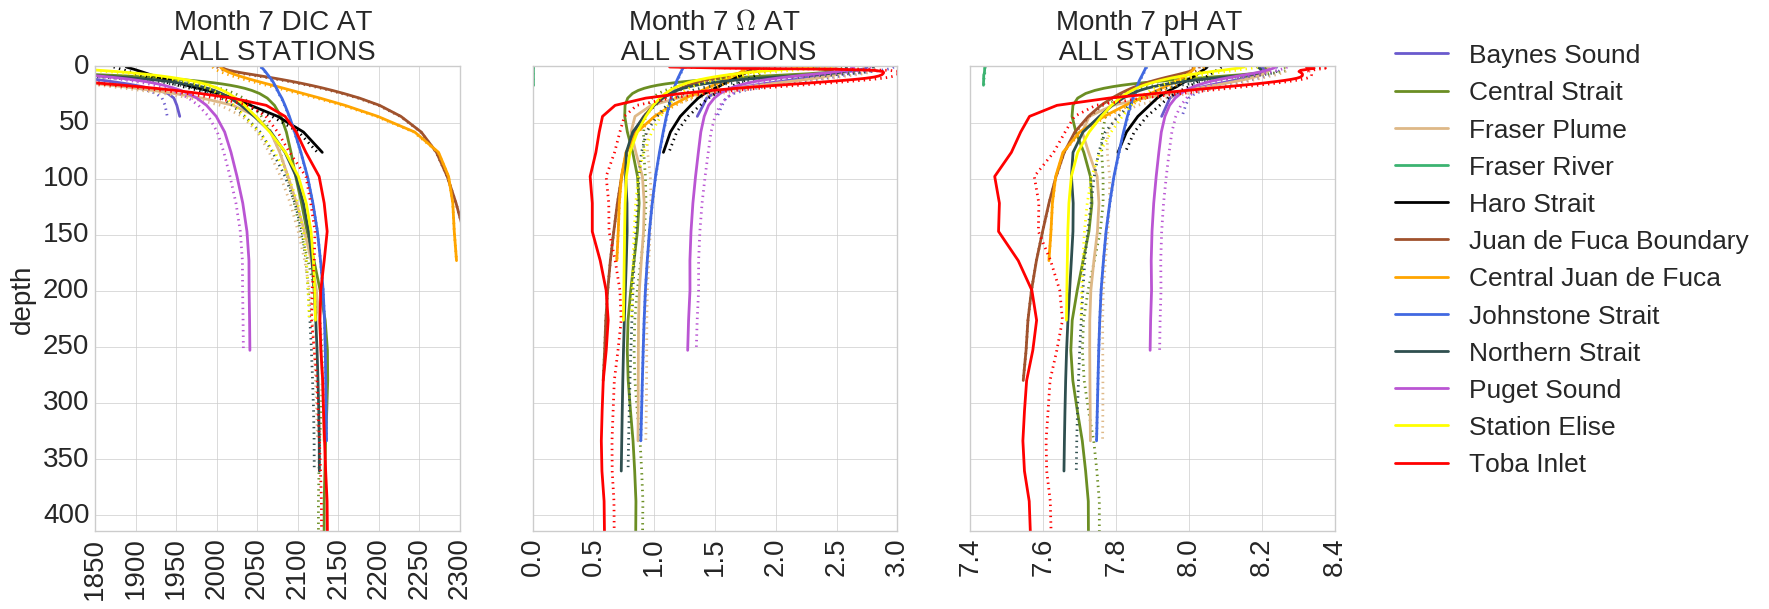

In [172]:
mon1 = 7
fname = 'DIC_TA_OmA_plots_allstn' + '_MON_' + str(mon1) +'.png'
xmin = 1600
xmax = 2300
ymin = 0
print(fname)
w2 = stn.index(tstn)
tdepth = stn_depths[w2]
print('Depth of stn ' + tstn + ' is '+ str(tdepth))


print('We are plotting months '+str(mon1)+', '+str(mon2)+', '+str(mon3))
ymax = tdepth


fig, ((ax, ax2, ax3)) \
= plt.subplots(1, 3, figsize=(16, 6), sharey=True)

ax.invert_yaxis()
for s in range(12):
    tstn = stn[s]
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
    mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
    mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
    mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
    mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
    mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
    mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
    mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

    ax.plot(mon_DIC_BR_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax.plot(mon_DIC_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle=':',color = cs.STATIONS[tstn]['color']) 

ax.set_ylim([ymax,ymin])
ax.set_xlim([1850,2300])
ax.set_title('Month ' + str(mon1) + ' DIC AT \n'+'ALL STATIONS', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=90)

#oma
for s in range(12):
    tstn = stn[s]
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
    mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
    mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
    mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
    mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
    mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
    mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
    mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

    tsra = np.ravel(mon_sal_BR_mean[mon1-1])
    ttera = np.ravel(mon_temp_BR_mean[mon1-1])
    tdra = np.ravel(mon_DIC_BR_mean[mon1-1]) * 1e-3
    ttara =  np.ravel(mon_TA_BR_mean[mon1-1]) * 1e-3
    tdepthra = np.ravel(prof_depth)
    tpressure = np.zeros_like(prof_depth)
    tpressure[:] =1
    tzero = tdepthra * 0 

    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH_BR,pco2,fco2,co2,hco3,co3,OmegaA_BR,OmegaC,BetaD,DENis,p,Tis = response_tup

    tsra = np.ravel(mon_sal_PI_mean[mon1-1])
    ttera = np.ravel(mon_temp_PI_mean[mon1-1])
    tdra = np.ravel(mon_DIC_PI_mean[mon1-1]) * 1e-3
    ttara =  np.ravel(mon_TA_PI_mean[mon1-1]) * 1e-3
    tdepthra = np.ravel(prof_depth)
    tpressure = np.zeros_like(prof_depth)
    tpressure[:] =1
    tzero = tdepthra * 0 

    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH_PI,pco2,fco2,co2,hco3,co3,OmegaA_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

    OmegaA_BR[OmegaA_BR>1e10] = np.nan
    OmegaA_PI[OmegaA_PI>1e10] = np.nan
    pH_BR[pH_BR>1e10] = np.nan
    pH_PI[pH_PI>1e10] = np.nan
    ax2.plot(OmegaA_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'])
    ax2.plot(OmegaA_PI,prof_depth,linewidth = 2, linestyle=':',color = cs.STATIONS[tstn]['color'])

    ax3.plot(pH_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color']) 
    ax3.plot(pH_PI,prof_depth,linewidth = 2, linestyle=':',color = cs.STATIONS[tstn]['color']) 
    #ax2.plot(OmegaA_PI,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PI RUN $\Omega$') 
ax2.set_title('Month ' + str(mon1) + ' $\Omega$ AT \n ALL STATIONS', fontsize = 20)
ax3.set_title('Month ' + str(mon1) + ' pH AT \n ALL STATIONS', fontsize = 20)

ax2.tick_params(axis='both', which='major', labelsize=20)


ax2.set_xlim([0,3])
ax3.set_xlim([7.4,8.4])
ax.legend(bbox_to_anchor=[4.6, 1.1], fontsize = 19)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('depth',fontsize = 20)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
fig.savefig(fname)

In [11]:
mon1 = 7
mon2 = 7
mon3 = 7
fname = 'DIC_TA_OmA_plots_somestn' + '_MON_' + str(mon1) +'.png'
xmin = 1600
xmax = 2300
ymin = 0
print(fname)
w2 = stn.index(tstn)
tdepth = stn_depths[w2]
print('Depth of stn ' + tstn + ' is '+ str(tdepth))


print('We are plotting months '+str(mon1)+', '+str(mon2)+', '+str(mon3))
ymax = tdepth


fig, ((ax, ax2, ax3)) \
= plt.subplots(1, 3, figsize=(16, 6), sharey=True)

ax.invert_yaxis()
for s in range(12):
    tstn = stn[s]
    if ((tstn is 'PS') | (tstn is 'SE') | (tstn is 'JDFC') | (tstn is 'NS') | (tstn is 'HS')) :
        print(tstn)
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

        ax.plot(mon_DIC_BR_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
        ax.plot(mon_DIC_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle=':',color = cs.STATIONS[tstn]['color']) 

ax.set_ylim([ymax,ymin])
ax.set_xlim([1850,2300])
ax.set_title('Month ' + str(mon1) + ' DIC AT \n'+'ALL STATIONS', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=90)

#oma
for s in range(12):
    tstn = stn[s]
    if ((tstn is 'PS') | (tstn is 'SE') | (tstn is 'JDFC') | (tstn is 'NS') | (tstn is 'HS')) :

        print(tstn)
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

        tsra = np.ravel(mon_sal_BR_mean[mon1-1])
        ttera = np.ravel(mon_temp_BR_mean[mon1-1])
        tdra = np.ravel(mon_DIC_BR_mean[mon1-1]) * 1e-3
        ttara =  np.ravel(mon_TA_BR_mean[mon1-1]) * 1e-3
        tdepthra = np.ravel(prof_depth)
        tpressure = np.zeros_like(prof_depth)
        tpressure[:] =1
        tzero = tdepthra * 0 

        tsra_psu = tsra*35/35.16504
        ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

        response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                           sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
        pH_BR,pco2,fco2,co2,hco3,co3,OmegaA_BR,OmegaC,BetaD,DENis,p,Tis = response_tup

        tsra = np.ravel(mon_sal_PI_mean[mon1-1])
        ttera = np.ravel(mon_temp_PI_mean[mon1-1])
        tdra = np.ravel(mon_DIC_PI_mean[mon1-1]) * 1e-3
        ttara =  np.ravel(mon_TA_PI_mean[mon1-1]) * 1e-3
        tdepthra = np.ravel(prof_depth)
        tpressure = np.zeros_like(prof_depth)
        tpressure[:] =1
        tzero = tdepthra * 0 

        tsra_psu = tsra*35/35.16504
        ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

        response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                           sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
        pH_PI,pco2,fco2,co2,hco3,co3,OmegaA_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

        OmegaA_BR[OmegaA_BR>1e10] = np.nan
        OmegaA_PI[OmegaA_PI>1e10] = np.nan
        pH_BR[pH_BR>1e10] = np.nan
        pH_PI[pH_PI>1e10] = np.nan
        ax2.plot(OmegaA_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'])
        ax2.plot(OmegaA_PI,prof_depth,linewidth = 2, linestyle=':',color = cs.STATIONS[tstn]['color'])

        ax3.plot(pH_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color']) 
        ax3.plot(pH_PI,prof_depth,linewidth = 2, linestyle=':',color = cs.STATIONS[tstn]['color']) 
    else:
        print('skipping station '+tstn)
ax.set_ylabel('depth',fontsize = 20)
ax.legend(bbox_to_anchor=[4.6, 1.1], fontsize = 19)    
ax2.set_title('Month ' + str(mon1) + ' $\Omega$ AT \n ALL STATIONS', fontsize = 20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.set_xlim([0,3])
ax3.set_title('Month ' + str(mon1) + ' pH AT \n ALL STATIONS', fontsize = 20)
ax3.set_xlim([7.4,8.4])
ax3.tick_params(axis='both', which='major', labelsize=20)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
fig.savefig(fname)

DIC_TA_OmA_plots_somestn_MON_7.png
Depth of stn TI is 414.5340881347656
We are plotting months 7, 7, 7
HS
JDFC
NS
PS
SE
skipping station BS
skipping station CS
skipping station FP
skipping station FR
HS
skipping station JDFB
JDFC
skipping station JS
NS
PS
SE
skipping station TI


DIC_TA_OmA_plots_somestn_MON_7.png
Depth of stn TI is 414.5340881347656
We are plotting months 7, 7, 7
HS
JDFC
NS
PS
SE
skipping station BS
skipping station CS
skipping station FP
skipping station FR
HS
skipping station JDFB
JDFC
skipping station JS
NS
PS
SE
skipping station TI


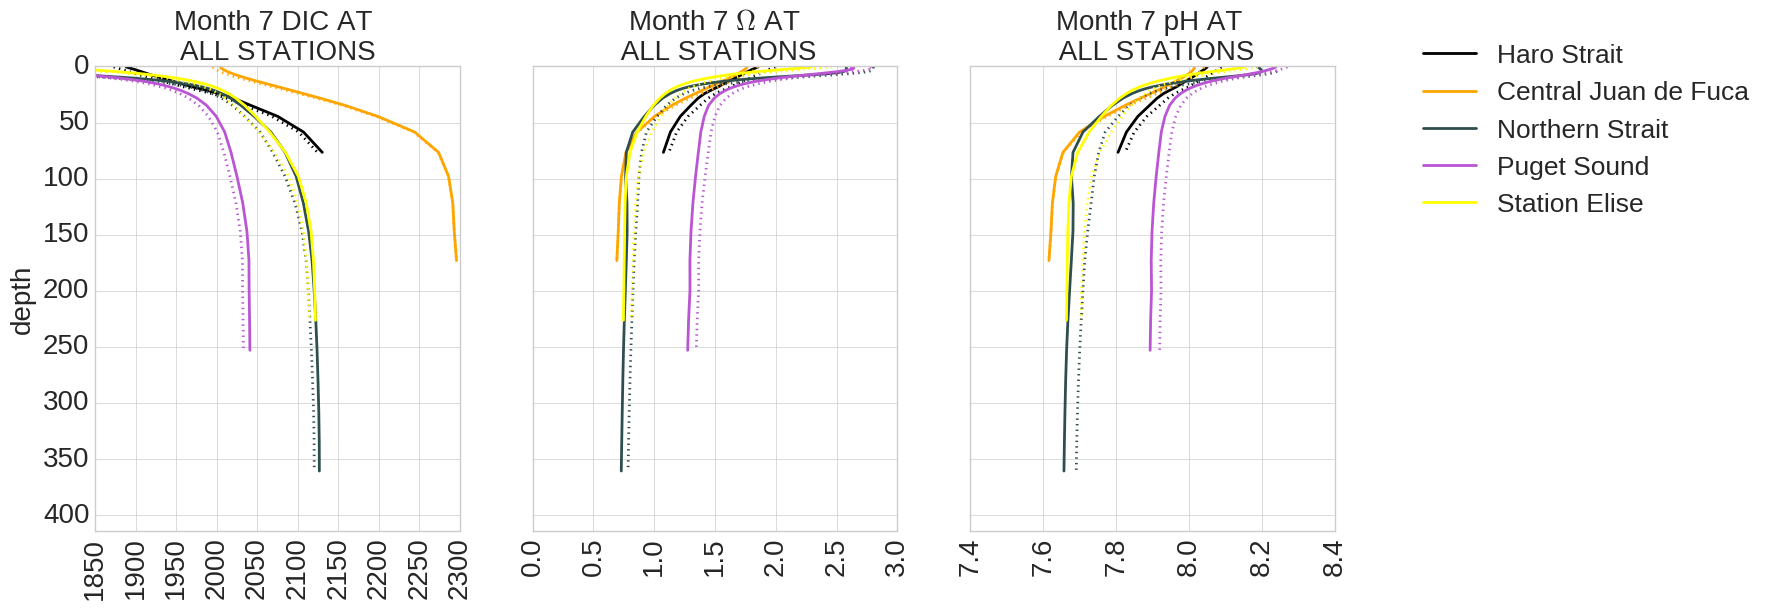

In [22]:
mon1 = 7
mon2 = 7
mon3 = 7
fname = 'DIC_TA_OmA_plots_somestn' + '_MON_' + str(mon1) +'.png'
xmin = 1600
xmax = 2300
ymin = 0
print(fname)
w2 = stn.index(tstn)
tdepth = stn_depths[w2]
print('Depth of stn ' + tstn + ' is '+ str(tdepth))


print('We are plotting months '+str(mon1)+', '+str(mon2)+', '+str(mon3))
ymax = tdepth


fig, ((ax, ax2, ax3)) \
= plt.subplots(1, 3, figsize=(16, 6), sharey=True)

ax.invert_yaxis()
for s in range(12):
    tstn = stn[s]
    if ((tstn is 'PS') | (tstn is 'SE') | (tstn is 'JDFC') | (tstn is 'NS') | (tstn is 'HS')) :
        print(tstn)
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

        ax.plot(mon_DIC_BR_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
        ax.plot(mon_DIC_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle=':',color = cs.STATIONS[tstn]['color']) 

ax.set_ylim([ymax,ymin])
ax.set_xlim([1850,2300])
ax.set_title('Month ' + str(mon1) + ' DIC AT \n'+'ALL STATIONS', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=90)

#oma
for s in range(12):
    tstn = stn[s]
    if ((tstn is 'PS') | (tstn is 'SE') | (tstn is 'JDFC') | (tstn is 'NS') | (tstn is 'HS')) :
        print(tstn)
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

        tsra = np.ravel(mon_sal_BR_mean[mon1-1])
        ttera = np.ravel(mon_temp_BR_mean[mon1-1])
        tdra = np.ravel(mon_DIC_BR_mean[mon1-1]) * 1e-3
        ttara =  np.ravel(mon_TA_BR_mean[mon1-1]) * 1e-3
        tdepthra = np.ravel(prof_depth)
        tpressure = np.zeros_like(prof_depth)
        tpressure[:] =1
        tzero = tdepthra * 0 

        tsra_psu = tsra*35/35.16504
        ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

        response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                           sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
        pH_BR,pco2,fco2,co2,hco3,co3,OmegaA_BR,OmegaC,BetaD,DENis,p,Tis = response_tup

        tsra = np.ravel(mon_sal_PI_mean[mon1-1])
        ttera = np.ravel(mon_temp_PI_mean[mon1-1])
        tdra = np.ravel(mon_DIC_PI_mean[mon1-1]) * 1e-3
        ttara =  np.ravel(mon_TA_PI_mean[mon1-1]) * 1e-3
        tdepthra = np.ravel(prof_depth)
        tpressure = np.zeros_like(prof_depth)
        tpressure[:] =1
        tzero = tdepthra * 0 

        tsra_psu = tsra*35/35.16504
        ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

        response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                           sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
        pH_PI,pco2,fco2,co2,hco3,co3,OmegaA_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

        OmegaA_BR[OmegaA_BR>1e10] = np.nan
        OmegaA_PI[OmegaA_PI>1e10] = np.nan
        pH_BR[pH_BR>1e10] = np.nan
        pH_PI[pH_PI>1e10] = np.nan
        ax2.plot(OmegaA_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'])
        ax2.plot(OmegaA_PI,prof_depth,linewidth = 2, linestyle=':',color = cs.STATIONS[tstn]['color'])

        ax3.plot(pH_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color']) 
        ax3.plot(pH_PI,prof_depth,linewidth = 2, linestyle=':',color = cs.STATIONS[tstn]['color']) 
    else:
        print('skipping station '+tstn)
ax.set_ylabel('depth',fontsize = 20)
ax.legend(bbox_to_anchor=[4.6, 1.1], fontsize = 19)    
ax2.set_title('Month ' + str(mon1) + ' $\Omega$ AT \n ALL STATIONS', fontsize = 20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.set_xlim([0,3])
ax3.set_title('Month ' + str(mon1) + ' pH AT \n ALL STATIONS', fontsize = 20)
ax3.set_xlim([7.4,8.4])
ax3.tick_params(axis='both', which='major', labelsize=20)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
fig.savefig(fname)

OmA_pH_plots_somestn_MON_1.png
Depth of stn TI is 414.5340881347656
We are plotting months 1, 1, 1
HS
go
JDFC
go
NS
go
PS
go
SE
go
HS
JDFC
NS
PS
SE


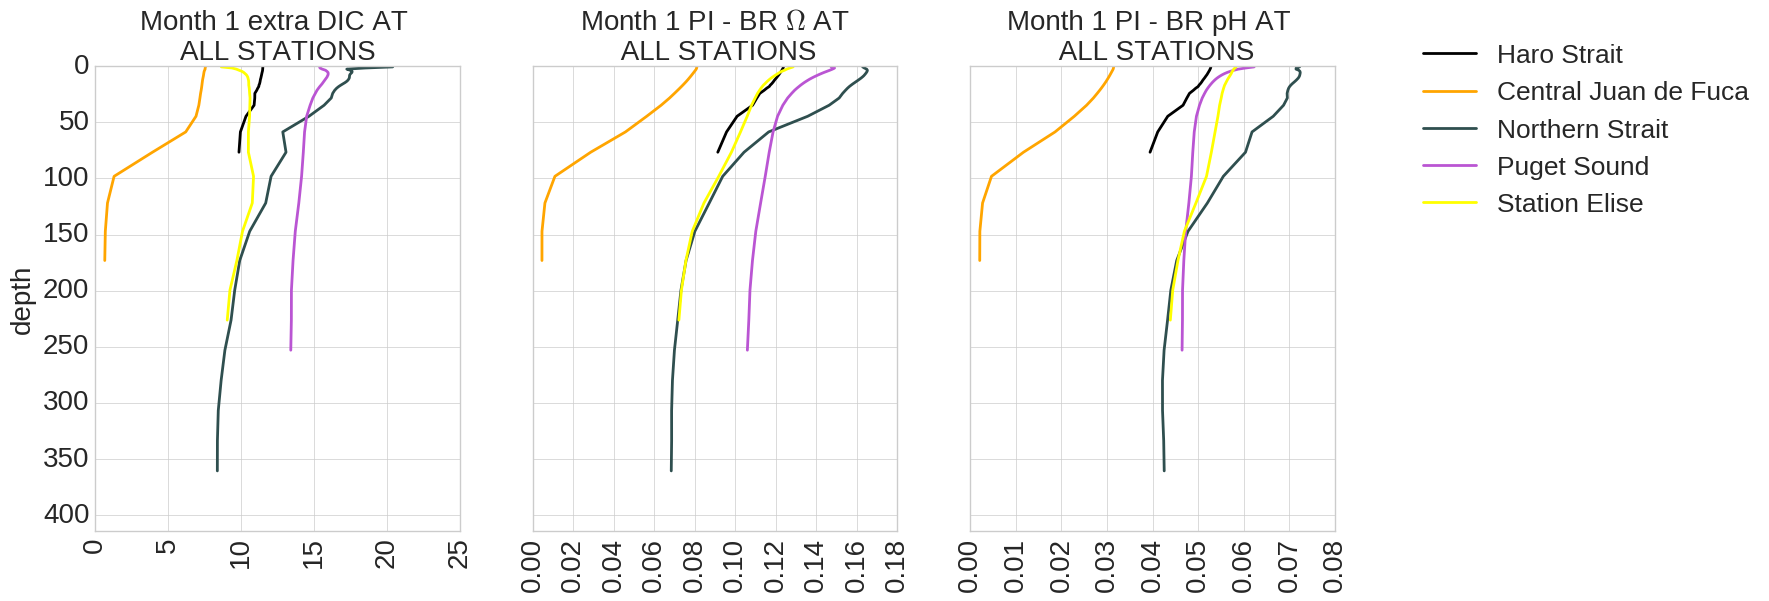

In [18]:
mon1 = 1
fname = 'OmA_pH_plots_somestn' + '_MON_' + str(mon1) +'.png'
xmin = 1600
xmax = 2300
ymin = 0
print(fname)
w2 = stn.index(tstn)
tdepth = stn_depths[w2]
print('Depth of stn ' + tstn + ' is '+ str(tdepth))


print('We are plotting months '+str(mon1)+', '+str(mon2)+', '+str(mon3))
ymax = tdepth


fig, ((ax, ax2, ax3)) \
= plt.subplots(1, 3, figsize=(16, 6), sharey=True)

ax.invert_yaxis()
for s in range(12):
    tstn = stn[s]
    if ((tstn is 'PS') | (tstn is 'SE') | (tstn is 'JDFC') | (tstn is 'NS') | (tstn is 'HS')) :
        
        print(tstn)
        
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']
        print('go')
        ax.plot(mon_DIC_BR_mean[mon1-1]-mon_DIC_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 

ax.set_ylim([ymax,ymin])

ax.set_title('Month ' + str(mon1) + ' extra DIC AT \n'+'ALL STATIONS', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=90)

#oma
for s in range(12):
    tstn = stn[s]
    if ((tstn is 'PS') | (tstn is 'SE') | (tstn is 'JDFC') | (tstn is 'NS') | (tstn is 'HS')) :
        print(tstn)
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

        tsra = np.ravel(mon_sal_BR_mean[mon1-1])
        ttera = np.ravel(mon_temp_BR_mean[mon1-1])
        tdra = np.ravel(mon_DIC_BR_mean[mon1-1]) * 1e-3
        ttara =  np.ravel(mon_TA_BR_mean[mon1-1]) * 1e-3
        tdepthra = np.ravel(prof_depth)
        tpressure = np.zeros_like(prof_depth)
        tpressure[:] =1
        tzero = tdepthra * 0 

        tsra_psu = tsra*35/35.16504
        ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

        response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                           sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
        pH_BR,pco2,fco2,co2,hco3,co3,OmegaA_BR,OmegaC,BetaD,DENis,p,Tis = response_tup

        tsra = np.ravel(mon_sal_PI_mean[mon1-1])
        ttera = np.ravel(mon_temp_PI_mean[mon1-1])
        tdra = np.ravel(mon_DIC_PI_mean[mon1-1]) * 1e-3
        ttara =  np.ravel(mon_TA_PI_mean[mon1-1]) * 1e-3
        tdepthra = np.ravel(prof_depth)
        tpressure = np.zeros_like(prof_depth)
        tpressure[:] =1
        tzero = tdepthra * 0 

        tsra_psu = tsra*35/35.16504
        ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

        response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                           sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
        pH_PI,pco2,fco2,co2,hco3,co3,OmegaA_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

        OmegaA_BR[OmegaA_BR>1e10] = np.nan
        OmegaA_PI[OmegaA_PI>1e10] = np.nan
        pH_BR[pH_BR>1e10] = np.nan
        pH_PI[pH_PI>1e10] = np.nan
        ax2.plot(OmegaA_PI-OmegaA_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'])
        ax3.plot(pH_PI-pH_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color']) 
    #ax2.plot(OmegaA_PI,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PI RUN $\Omega$') 
ax2.set_title('Month ' + str(mon1) + ' PI - BR $\Omega$ AT \n ALL STATIONS', fontsize = 20)
ax3.set_title('Month ' + str(mon1) + ' PI - BR pH AT \n ALL STATIONS', fontsize = 20)

ax2.tick_params(axis='both', which='major', labelsize=20)


#ax2.set_xlim([0,3])
ax.legend(bbox_to_anchor=[4.6, 1.1], fontsize = 19)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('depth',fontsize = 20)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
fig.savefig(fname)

OmA_pH_plots_somestn_MON_3.png
Depth of stn TI is 414.5340881347656
We are plotting months 3, 1, 1
HS
go
JDFC
go
NS
go
PS
go
SE
go
HS
JDFC
NS
PS
SE


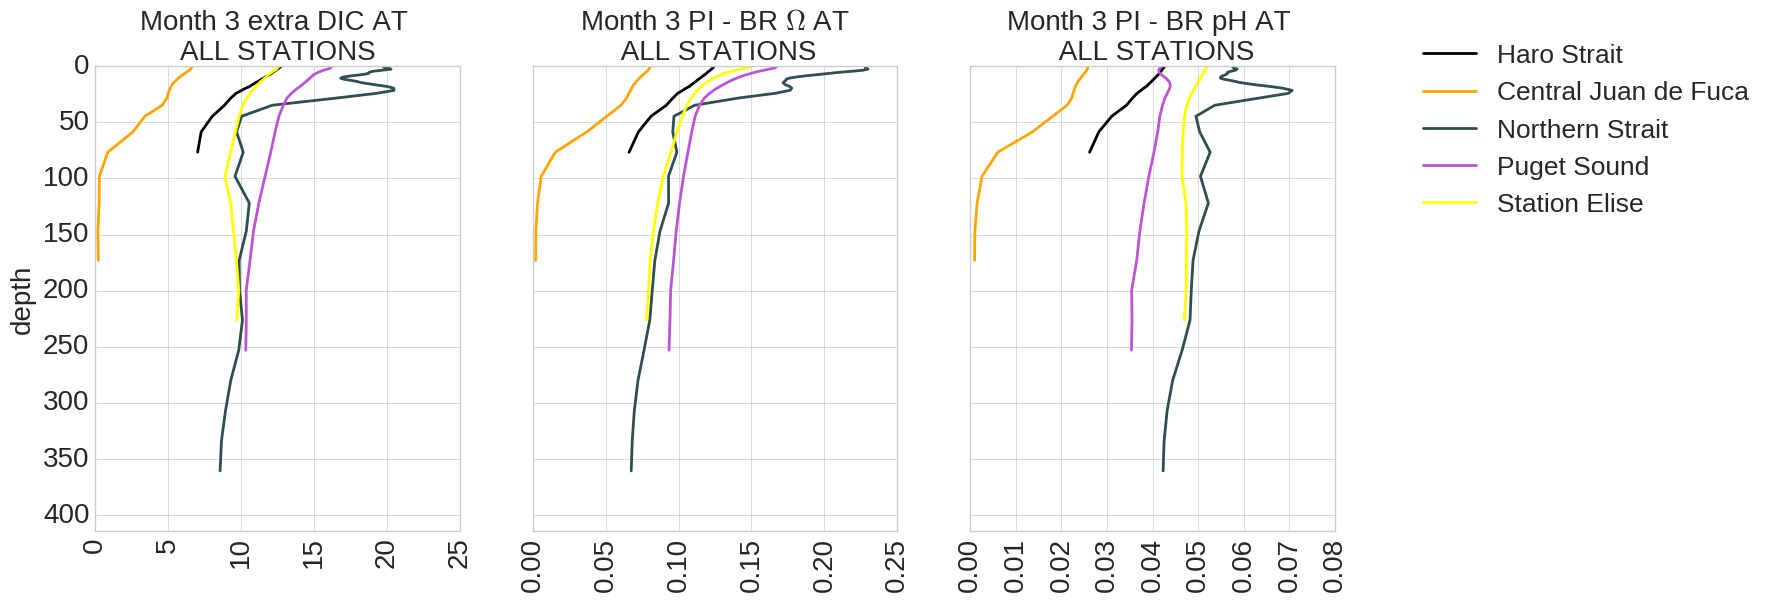

In [19]:
mon1 = 3
fname = 'OmA_pH_plots_somestn' + '_MON_' + str(mon1) +'.png'
xmin = 1600
xmax = 2300
ymin = 0
print(fname)
w2 = stn.index(tstn)
tdepth = stn_depths[w2]
print('Depth of stn ' + tstn + ' is '+ str(tdepth))


print('We are plotting months '+str(mon1)+', '+str(mon2)+', '+str(mon3))
ymax = tdepth


fig, ((ax, ax2, ax3)) \
= plt.subplots(1, 3, figsize=(16, 6), sharey=True)

ax.invert_yaxis()
for s in range(12):
    tstn = stn[s]
    if ((tstn is 'PS') | (tstn is 'SE') | (tstn is 'JDFC') | (tstn is 'NS') | (tstn is 'HS')) :
        
        print(tstn)
        
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']
        print('go')
        ax.plot(mon_DIC_BR_mean[mon1-1]-mon_DIC_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 

ax.set_ylim([ymax,ymin])

ax.set_title('Month ' + str(mon1) + ' extra DIC AT \n'+'ALL STATIONS', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=90)

#oma
for s in range(12):
    tstn = stn[s]
    if ((tstn is 'PS') | (tstn is 'SE') | (tstn is 'JDFC') | (tstn is 'NS') | (tstn is 'HS')) :
        print(tstn)
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

        tsra = np.ravel(mon_sal_BR_mean[mon1-1])
        ttera = np.ravel(mon_temp_BR_mean[mon1-1])
        tdra = np.ravel(mon_DIC_BR_mean[mon1-1]) * 1e-3
        ttara =  np.ravel(mon_TA_BR_mean[mon1-1]) * 1e-3
        tdepthra = np.ravel(prof_depth)
        tpressure = np.zeros_like(prof_depth)
        tpressure[:] =1
        tzero = tdepthra * 0 

        tsra_psu = tsra*35/35.16504
        ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

        response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                           sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
        pH_BR,pco2,fco2,co2,hco3,co3,OmegaA_BR,OmegaC,BetaD,DENis,p,Tis = response_tup

        tsra = np.ravel(mon_sal_PI_mean[mon1-1])
        ttera = np.ravel(mon_temp_PI_mean[mon1-1])
        tdra = np.ravel(mon_DIC_PI_mean[mon1-1]) * 1e-3
        ttara =  np.ravel(mon_TA_PI_mean[mon1-1]) * 1e-3
        tdepthra = np.ravel(prof_depth)
        tpressure = np.zeros_like(prof_depth)
        tpressure[:] =1
        tzero = tdepthra * 0 

        tsra_psu = tsra*35/35.16504
        ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

        response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                           sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
        pH_PI,pco2,fco2,co2,hco3,co3,OmegaA_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

        OmegaA_BR[OmegaA_BR>1e10] = np.nan
        OmegaA_PI[OmegaA_PI>1e10] = np.nan
        pH_BR[pH_BR>1e10] = np.nan
        pH_PI[pH_PI>1e10] = np.nan
        ax2.plot(OmegaA_PI-OmegaA_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'])
        ax3.plot(pH_PI-pH_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color']) 
    #ax2.plot(OmegaA_PI,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PI RUN $\Omega$') 
ax2.set_title('Month ' + str(mon1) + ' PI - BR $\Omega$ AT \n ALL STATIONS', fontsize = 20)
ax3.set_title('Month ' + str(mon1) + ' PI - BR pH AT \n ALL STATIONS', fontsize = 20)

ax2.tick_params(axis='both', which='major', labelsize=20)


#ax2.set_xlim([0,3])
ax.legend(bbox_to_anchor=[4.6, 1.1], fontsize = 19)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('depth',fontsize = 20)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
fig.savefig(fname)

OmA_pH_plots_somestn_MON_1.png
Depth of stn TI is 414.5340881347656
We are plotting months 1, 7, 7
HS
go
JDFC
go
NS
go
PS
go
SE
go
HS
JDFC
NS
PS
SE


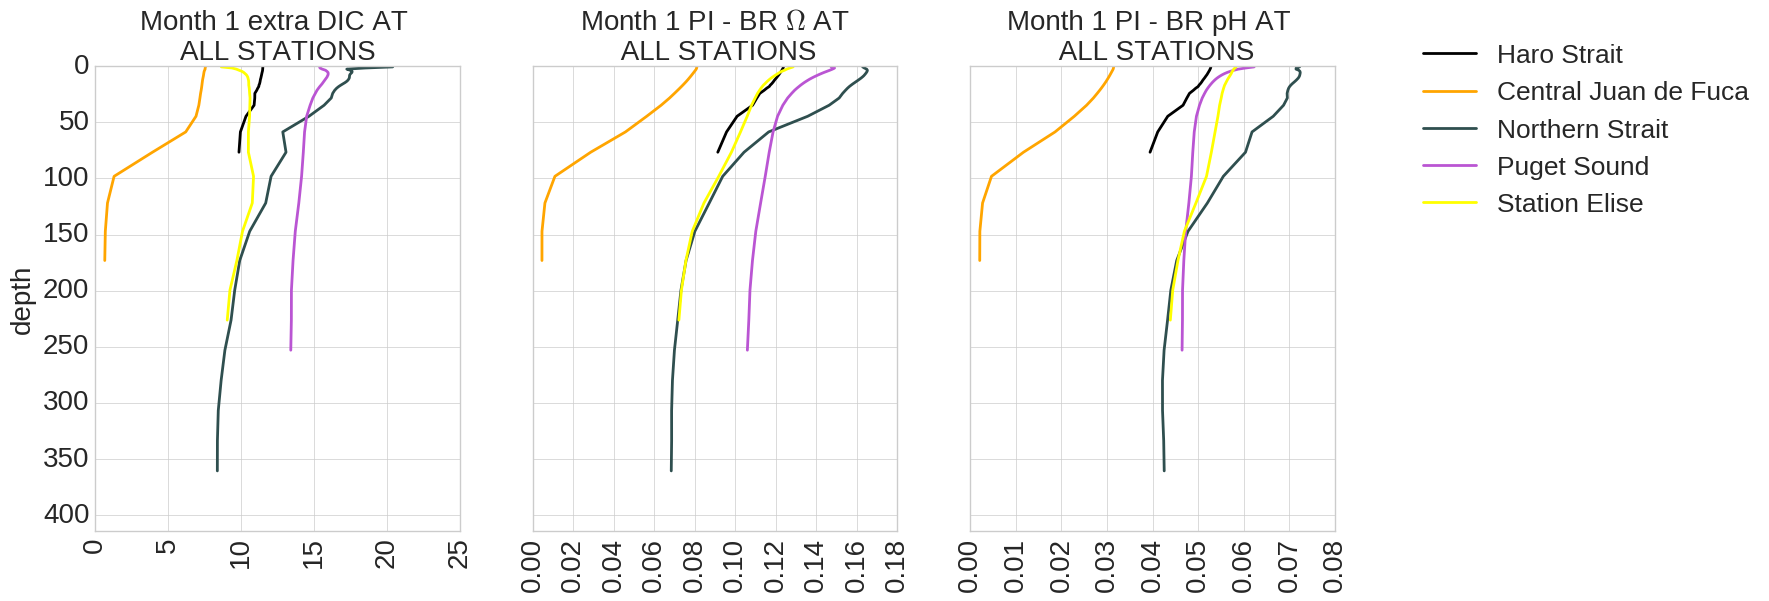

In [23]:
mon1 = 1
fname = 'OmA_pH_plots_somestn' + '_MON_' + str(mon1) +'.png'
xmin = 1600
xmax = 2300
ymin = 0
print(fname)
w2 = stn.index(tstn)
tdepth = stn_depths[w2]
print('Depth of stn ' + tstn + ' is '+ str(tdepth))


print('We are plotting months '+str(mon1)+', '+str(mon2)+', '+str(mon3))
ymax = tdepth


fig, ((ax, ax2, ax3)) \
= plt.subplots(1, 3, figsize=(16, 6), sharey=True)

ax.invert_yaxis()
for s in range(12):
    tstn = stn[s]
    if ((tstn is 'PS') | (tstn is 'SE') | (tstn is 'JDFC') | (tstn is 'NS') | (tstn is 'HS')) :
        
        print(tstn)
        
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']
        print('go')
        ax.plot(mon_DIC_BR_mean[mon1-1]-mon_DIC_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 

ax.set_ylim([ymax,ymin])

ax.set_title('Month ' + str(mon1) + ' extra DIC AT \n'+'ALL STATIONS', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=90)

#oma
for s in range(12):
    tstn = stn[s]
    if ((tstn is 'PS') | (tstn is 'SE') | (tstn is 'JDFC') | (tstn is 'NS') | (tstn is 'HS')) :
        print(tstn)
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

        tsra = np.ravel(mon_sal_BR_mean[mon1-1])
        ttera = np.ravel(mon_temp_BR_mean[mon1-1])
        tdra = np.ravel(mon_DIC_BR_mean[mon1-1]) * 1e-3
        ttara =  np.ravel(mon_TA_BR_mean[mon1-1]) * 1e-3
        tdepthra = np.ravel(prof_depth)
        tpressure = np.zeros_like(prof_depth)
        tpressure[:] =1
        tzero = tdepthra * 0 

        tsra_psu = tsra*35/35.16504
        ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

        response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                           sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
        pH_BR,pco2,fco2,co2,hco3,co3,OmegaA_BR,OmegaC,BetaD,DENis,p,Tis = response_tup

        tsra = np.ravel(mon_sal_PI_mean[mon1-1])
        ttera = np.ravel(mon_temp_PI_mean[mon1-1])
        tdra = np.ravel(mon_DIC_PI_mean[mon1-1]) * 1e-3
        ttara =  np.ravel(mon_TA_PI_mean[mon1-1]) * 1e-3
        tdepthra = np.ravel(prof_depth)
        tpressure = np.zeros_like(prof_depth)
        tpressure[:] =1
        tzero = tdepthra * 0 

        tsra_psu = tsra*35/35.16504
        ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

        response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                           sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
        pH_PI,pco2,fco2,co2,hco3,co3,OmegaA_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

        OmegaA_BR[OmegaA_BR>1e10] = np.nan
        OmegaA_PI[OmegaA_PI>1e10] = np.nan
        pH_BR[pH_BR>1e10] = np.nan
        pH_PI[pH_PI>1e10] = np.nan
        ax2.plot(OmegaA_PI-OmegaA_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color'])
        ax3.plot(pH_PI-pH_BR,prof_depth,linewidth = 2, linestyle='-',color = cs.STATIONS[tstn]['color']) 
    #ax2.plot(OmegaA_PI,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PI RUN $\Omega$') 
ax2.set_title('Month ' + str(mon1) + ' PI - BR $\Omega$ AT \n ALL STATIONS', fontsize = 20)
ax3.set_title('Month ' + str(mon1) + ' PI - BR pH AT \n ALL STATIONS', fontsize = 20)

ax2.tick_params(axis='both', which='major', labelsize=20)


#ax2.set_xlim([0,3])
ax.legend(bbox_to_anchor=[4.6, 1.1], fontsize = 19)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('depth',fontsize = 20)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
fig.savefig(fname)

In [27]:
mon1 = 1
mon2 = 1
mon3 = 1
fname = 'DIC_TA_OmA_plots_somestn' + '_MON_' + str(mon1) +'.png'
xmin = 1600
xmax = 2300
ymin = 0
print(fname)
w2 = stn.index(tstn)
tdepth = stn_depths[w2]
print('Depth of stn ' + tstn + ' is '+ str(tdepth))


print('We are plotting months '+str(mon1)+', '+str(mon2)+', '+str(mon3))
ymax = tdepth


fig, ((ax, ax2, ax3)) \
= plt.subplots(1, 3, figsize=(16, 6), sharey=True)

ax.invert_yaxis()
for s in range(12):
    tstn = stn[s]
    if ((tstn is 'SE')) :
        print(tstn)
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

        ax.plot(mon_DIC_BR_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = 'gold', label = cs.STATIONS[tstn]['fullname']) 
        ax.plot(mon_DIC_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle=':',color = 'gold') 
        ax.plot(mon_TA_BR_mean[mon1-1],prof_depth,linewidth = 2, linestyle='-',color = 'k', label = cs.STATIONS[tstn]['fullname'] + ' TA') 
        ax.plot(mon_TA_PI_mean[mon1-1],prof_depth,linewidth = 2, linestyle=':',color = 'k') 

ax.set_ylim([ymax,ymin])
ax.set_xlim([1850,2300])
ax.set_title('Month ' + str(mon1) + ' DIC AT \n'+'ALL STATIONS', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=90)

#oma
for s in range(12):
    tstn = stn[s]
    if ((tstn is 'SE')) :
        print(tstn)
        ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
        w = nc.Dataset(ncname)
        mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
        mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
        mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
        mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
        mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
        mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
        mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
        mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

        tsra = np.ravel(mon_sal_BR_mean[mon1-1])
        ttera = np.ravel(mon_temp_BR_mean[mon1-1])
        tdra = np.ravel(mon_DIC_BR_mean[mon1-1]) * 1e-3
        ttara =  np.ravel(mon_TA_BR_mean[mon1-1]) * 1e-3
        tdepthra = np.ravel(prof_depth)
        tpressure = np.zeros_like(prof_depth)
        tpressure[:] =1
        tzero = tdepthra * 0 

        tsra_psu = tsra*35/35.16504
        ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

        response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                           sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
        pH_BR,pco2,fco2,co2,hco3,co3,OmegaA_BR,OmegaC,BetaD,DENis,p,Tis = response_tup

        tsra = np.ravel(mon_sal_PI_mean[mon1-1])
        ttera = np.ravel(mon_temp_PI_mean[mon1-1])
        tdra = np.ravel(mon_DIC_PI_mean[mon1-1]) * 1e-3
        ttara =  np.ravel(mon_TA_PI_mean[mon1-1]) * 1e-3
        tdepthra = np.ravel(prof_depth)
        tpressure = np.zeros_like(prof_depth)
        tpressure[:] =1
        tzero = tdepthra * 0 

        tsra_psu = tsra*35/35.16504
        ttera_is = gsw.t_from_CT(tsra,ttera,tdepthra)

        response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                           sil=tzero, phos=tzero, patm=tpressure, depth=tdepthra, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
        pH_PI,pco2,fco2,co2,hco3,co3,OmegaA_PI,OmegaC,BetaD,DENis,p,Tis = response_tup

        OmegaA_BR[OmegaA_BR>1e10] = np.nan
        OmegaA_PI[OmegaA_PI>1e10] = np.nan
        pH_BR[pH_BR>1e10] = np.nan
        pH_PI[pH_PI>1e10] = np.nan
        ax2.plot(OmegaA_BR,prof_depth,linewidth = 2, linestyle='-',color = 'gold')
        ax2.plot(OmegaA_PI,prof_depth,linewidth = 2, linestyle=':',color = 'gold')

        ax3.plot(pH_BR,prof_depth,linewidth = 2, linestyle='-',color = 'gold') 
        ax3.plot(pH_PI,prof_depth,linewidth = 2, linestyle=':',color = 'gold') 
    else:
        print('skipping station '+tstn)
ax.set_ylabel('depth',fontsize = 20)
ax.legend(bbox_to_anchor=[4.6, 1.1], fontsize = 19)    
ax2.set_title('Month ' + str(mon1) + ' $\Omega$ AT \n ALL STATIONS', fontsize = 20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.set_xlim([0,3])
ax3.set_title('Month ' + str(mon1) + ' pH AT \n ALL STATIONS', fontsize = 20)
ax3.set_xlim([7.4,8.4])
ax3.tick_params(axis='both', which='major', labelsize=20)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
fig.savefig(fname)

DIC_TA_OmA_plots_somestn_MON_1.png
Depth of stn TI is 414.5340881347656
We are plotting months 1, 1, 1
SE
skipping station BS
skipping station CS
skipping station FP
skipping station FR
skipping station HS
skipping station JDFB
skipping station JDFC
skipping station JS
skipping station NS
skipping station PS
SE
skipping station TI


In [105]:
mon1 = 1
fig, ((ax, ax2),(ax3, ax4)) \
= plt.subplots(2, 2, figsize=(11, 11), sharey=False)

#ax.invert_yaxis()
for s in range(12):

    tstn = stn[s]
    print(tstn)
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
    mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
    mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
    mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
    mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
    mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
    mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
    mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

    w = mon_DIC_BR_mean[mon1-1]
    nans = np.where(np.isnan(w))
    firstnan = (nans[0][0])
    bottomDIC_BR = w[firstnan-1]
    topDIC_BR = w[0]
    diffDIC_BR = bottomDIC_BR - topDIC_BR
    w = mon_TA_BR_mean[mon1-1]
    nans = np.where(np.isnan(w))
    firstnan = (nans[0][0])
    bottomTA_BR = w[firstnan-1]
    topTA_BR = w[0]
    diffTA_BR = bottomTA_BR - topTA_BR

    w2 = mon_DIC_PI_mean[mon1-1]
    nans2 = np.where(np.isnan(w2))
    firstnan2 = (nans2[0][0])
    bottomDIC_PI = w2[firstnan2-1]
    topDIC_PI = w2[0]
    diffDIC_PI = bottomDIC_PI - topDIC_PI
    w2 = mon_TA_PI_mean[mon1-1]
    nans2 = np.where(np.isnan(w2))
    firstnan2 = (nans2[0][0])
    bottomTA_PI = w2[firstnan2-1]
    topTA_PI = w2[0]
    diffTA_PI = bottomTA_PI - topTA_PI

    ax.plot(diffDIC_BR,diffTA_BR,markersize = 20, marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    bottoms_BR = [bottomDIC_BR,bottomTA_BR]
    tops_BR = [topDIC_BR,topTA_BR]
    ax2.plot(bottoms_BR,tops_BR,markersize = 20, linestyle = '-',marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    bottoms_PI = [bottomDIC_PI,bottomTA_PI]
    tops_PI = [topDIC_PI,topTA_PI]
    ax2.plot(bottoms_PI,tops_PI,markersize = 20, linestyle = '-',marker = '.',alpha = 0.3,markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax3.plot(bottomDIC_BR-bottomDIC_PI,topDIC_BR-topDIC_PI,markersize = 20, marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax3.plot(bottomTA_BR-bottomTA_PI,topTA_BR-topTA_PI,markersize = 20, marker = '+',markeredgewidth=2,color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax4.plot(bottomDIC_BR-bottomDIC_PI,topDIC_BR-topDIC_PI,markersize = 20, marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax4.plot(bottomTA_BR-bottomTA_PI,topTA_BR-topTA_PI,markersize = 20, marker = '+',markeredgewidth=2,color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 


ax.set_xlabel('DIC difference (bottom - top)', fontsize = 20)
ax.set_ylabel('TA difference (bottom - top)', fontsize = 20)
ax2.set_xlabel('bottom DIC, TA', fontsize = 20)
ax2.set_ylabel('top DIC, TA', fontsize = 20)
ax3.set_xlabel('bottom DIC_BR - bottom DIC_PI', fontsize = 20)
ax3.set_ylabel('top DIC_BR - top DIC_PI', fontsize = 20)
ax4.set_xlabel('bottom DIC_BR - bottom DIC_PI', fontsize = 20)
ax4.set_ylabel('top DIC_BR - top DIC_PI', fontsize = 20)
#
ax2.set_xlim([1450,2350])   
ax2.set_ylim([1450,2350]) 
ax3.set_xlim([-40,100])   
ax3.set_ylim([-40,100])
ax4.set_xlim([-20,20])   
ax4.set_ylim([-20,20])
ax.set_title('Month ' + str(mon1) +' bottom-top \n DIC, TA differences \n (transparent = PI)', fontsize = 20)
ax2.set_title('Month ' + str(mon1) +' bottom-top \n DIC, TA differences \n (transparent = PI)', fontsize = 20)
ax3.set_title('Month ' + str(mon1) +' DIC_BR-DIC_PI differences \n (crosses = TA_BR - TA_PI)', fontsize = 20)
ax4.set_title('Month ' + str(mon1) +' DIC_BR-DIC_PI differences \n (crosses = TA_BR - TA_PI)', fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.xticks(rotation=90)

BS
CS
FP
FR
HS
JDFB
JDFC
JS
NS
PS
SE
TI


(array([-20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 <a list of 9 Text xticklabel objects>)

BS
CS
FP
FR
HS
JDFB
JDFC
JS
NS
PS
SE
TI


(array([-20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 <a list of 9 Text xticklabel objects>)

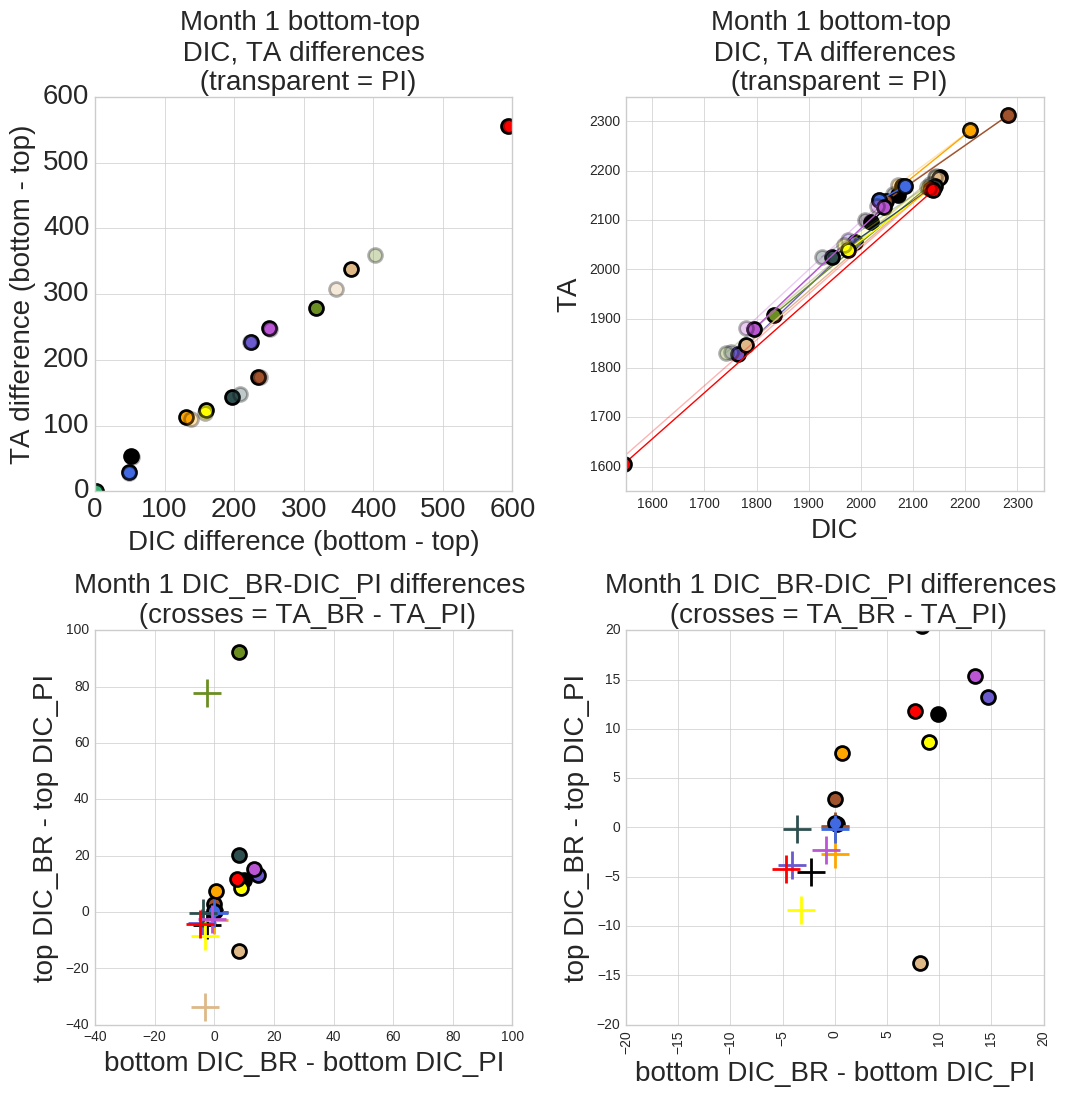

In [108]:
mon1 = 1
fig, ((ax, ax2),(ax3, ax4)) \
= plt.subplots(2, 2, figsize=(11, 11), sharey=False)

#ax.invert_yaxis()
for s in range(12):

    tstn = stn[s]
    print(tstn)
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
    mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
    mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
    mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
    mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
    mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
    mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
    mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

    w = mon_DIC_BR_mean[mon1-1]
    nans = np.where(np.isnan(w))
    firstnan = (nans[0][0])
    bottomDIC_BR = w[firstnan-1]
    topDIC_BR = w[0]
    diffDIC_BR = bottomDIC_BR - topDIC_BR
    w = mon_TA_BR_mean[mon1-1]
    nans = np.where(np.isnan(w))
    firstnan = (nans[0][0])
    bottomTA_BR = w[firstnan-1]
    topTA_BR = w[0]
    diffTA_BR = bottomTA_BR - topTA_BR

    w2 = mon_DIC_PI_mean[mon1-1]
    nans2 = np.where(np.isnan(w2))
    firstnan2 = (nans2[0][0])
    bottomDIC_PI = w2[firstnan2-1]
    topDIC_PI = w2[0]
    diffDIC_PI = bottomDIC_PI - topDIC_PI
    w2 = mon_TA_PI_mean[mon1-1]
    nans2 = np.where(np.isnan(w2))
    firstnan2 = (nans2[0][0])
    bottomTA_PI = w2[firstnan2-1]
    topTA_PI = w2[0]
    diffTA_PI = bottomTA_PI - topTA_PI

    ax.plot(diffDIC_BR,diffTA_BR,markersize = 20, marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    DIC = [bottomDIC_BR,topDIC_BR]
    TA = [bottomTA_BR,topTA_BR]
    ax2.plot(DIC,TA,markersize = 20, linestyle = '-',marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    DIC_PI = [bottomDIC_PI,topDIC_PI]
    TA_PI = [bottomTA_PI,topTA_PI]
    ax2.plot(DIC_PI,TA_PI,markersize = 20, linestyle = '-',marker = '.',alpha = 0.3,markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 

    ax3.plot(bottomDIC_BR-bottomDIC_PI,topDIC_BR-topDIC_PI,markersize = 20, marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax3.plot(bottomTA_BR-bottomTA_PI,topTA_BR-topTA_PI,markersize = 20, marker = '+',markeredgewidth=2,color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax4.plot(bottomDIC_BR-bottomDIC_PI,topDIC_BR-topDIC_PI,markersize = 20, marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax4.plot(bottomTA_BR-bottomTA_PI,topTA_BR-topTA_PI,markersize = 20, marker = '+',markeredgewidth=2,color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 


ax.set_xlabel('DIC difference (bottom - top)', fontsize = 20)
ax.set_ylabel('TA difference (bottom - top)', fontsize = 20)
ax2.set_xlabel('DIC', fontsize = 20)
ax2.set_ylabel('TA', fontsize = 20)
ax3.set_xlabel('bottom DIC_BR - bottom DIC_PI', fontsize = 20)
ax3.set_ylabel('top DIC_BR - top DIC_PI', fontsize = 20)
ax4.set_xlabel('bottom DIC_BR - bottom DIC_PI', fontsize = 20)
ax4.set_ylabel('top DIC_BR - top DIC_PI', fontsize = 20)
#
ax2.set_xlim([1550,2350])   
ax2.set_ylim([1550,2350]) 
ax3.set_xlim([-40,100])   
ax3.set_ylim([-40,100])
ax4.set_xlim([-20,20])   
ax4.set_ylim([-20,20])
ax.set_title('Month ' + str(mon1) +' bottom-top \n DIC, TA differences \n (transparent = PI)', fontsize = 20)
ax2.set_title('Month ' + str(mon1) +' bottom-top \n DIC, TA differences \n (transparent = PI)', fontsize = 20)
ax3.set_title('Month ' + str(mon1) +' DIC_BR-DIC_PI differences \n (crosses = TA_BR - TA_PI)', fontsize = 20)
ax4.set_title('Month ' + str(mon1) +' DIC_BR-DIC_PI differences \n (crosses = TA_BR - TA_PI)', fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.xticks(rotation=90)

## What is the gradient in DIC, TA bottom to top?



In [ ]:
mon1 = 1
fig, ((ax, ax2),(ax3, ax4)) \
= plt.subplots(2, 2, figsize=(11, 11), sharey=False)

#ax.invert_yaxis()
for s in range(12):

    tstn = stn[s]
    print(tstn)
    ncname = './pibr/' + tstn + '_stored_PI_BR_output.nc'
    w = nc.Dataset(ncname)
    mon_DIC_BR_mean  = w['ncoutput']['mon_DIC_BR_mean']
    mon_DIC_PI_mean = w['ncoutput']['mon_DIC_PI_mean']
    mon_TA_BR_mean  = w['ncoutput']['mon_TA_BR_mean']
    mon_TA_PI_mean = w['ncoutput']['mon_TA_PI_mean']
    mon_sal_BR_mean  = w['ncoutput']['mon_sal_BR_mean']
    mon_sal_PI_mean = w['ncoutput']['mon_sal_PI_mean']
    mon_temp_BR_mean  = w['ncoutput']['mon_temp_BR_mean']
    mon_temp_PI_mean = w['ncoutput']['mon_temp_PI_mean']

    w = mon_DIC_BR_mean[mon1-1]
    nans = np.where(np.isnan(w))
    firstnan = (nans[0][0])
    bottomDIC_BR = w[firstnan-1]
    topDIC_BR = w[0]
    diffDIC_BR = bottomDIC_BR - topDIC_BR
    w = mon_TA_BR_mean[mon1-1]
    nans = np.where(np.isnan(w))
    firstnan = (nans[0][0])
    bottomTA_BR = w[firstnan-1]
    topTA_BR = w[0]
    diffTA_BR = bottomTA_BR - topTA_BR

    w2 = mon_DIC_PI_mean[mon1-1]
    nans2 = np.where(np.isnan(w2))
    firstnan2 = (nans2[0][0])
    bottomDIC_PI = w2[firstnan2-1]
    topDIC_PI = w2[0]
    diffDIC_PI = bottomDIC_PI - topDIC_PI
    w2 = mon_TA_PI_mean[mon1-1]
    nans2 = np.where(np.isnan(w2))
    firstnan2 = (nans2[0][0])
    bottomTA_PI = w2[firstnan2-1]
    topTA_PI = w2[0]
    diffTA_PI = bottomTA_PI - topTA_PI

    ax.plot(diffDIC_BR,diffTA_BR,markersize = 20, marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    DIC = [bottomDIC_BR,topDIC_BR]
    TA = [bottomTA_BR,topTA_BR]
    ax2.plot(DIC,TA,markersize = 20, linestyle = '-',marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    DIC_PI = [bottomDIC_PI,topDIC_PI]
    TA_PI = [bottomTA_PI,topTA_PI]
    ax2.plot(DIC_PI,TA_PI,markersize = 20, linestyle = '-',marker = '.',alpha = 0.3,markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname'])     #ax2.plot(diffDIC_PI,diffTA_PI,markersize = 20, marker = '.',markeredgewidth=2, alpha = 0.3, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 

    ax3.plot(bottomDIC_BR-bottomDIC_PI,topDIC_BR-topDIC_PI,markersize = 20, marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax3.plot(bottomTA_BR-bottomTA_PI,topTA_BR-topTA_PI,markersize = 20, marker = '+',markeredgewidth=2,color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax4.plot(bottomDIC_BR-bottomDIC_PI,topDIC_BR-topDIC_PI,markersize = 20, marker = '.',markeredgewidth=2, markeredgecolor='k',color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 
    ax4.plot(bottomTA_BR-bottomTA_PI,topTA_BR-topTA_PI,markersize = 20, marker = '+',markeredgewidth=2,color = cs.STATIONS[tstn]['color'], label = cs.STATIONS[tstn]['fullname']) 


ax.set_xlabel('DIC difference (bottom - top)', fontsize = 20)
ax.set_ylabel('TA difference (bottom - top)', fontsize = 20)
ax2.set_xlabel('DIC', fontsize = 20)
ax2.set_ylabel('TA', fontsize = 20)
ax3.set_xlabel('bottom DIC_BR - bottom DIC_PI', fontsize = 20)
ax3.set_ylabel('top DIC_BR - top DIC_PI', fontsize = 20)
ax4.set_xlabel('bottom DIC_BR - bottom DIC_PI', fontsize = 20)
ax4.set_ylabel('top DIC_BR - top DIC_PI', fontsize = 20)
#
ax2.set_xlim([1550,2350])   
ax2.set_ylim([1550,2350]) 
ax3.set_xlim([-40,100])   
ax3.set_ylim([-40,100])
ax4.set_xlim([-20,20])   
ax4.set_ylim([-20,20])
ax.set_title('Month ' + str(mon1) +' bottom-top \n DIC, TA differences \n (transparent = PI)', fontsize = 20)
ax2.set_title('Month ' + str(mon1) +' bottom-top \n DIC, TA differences \n (transparent = PI)', fontsize = 20)
ax3.set_title('Month ' + str(mon1) +' DIC_BR-DIC_PI differences \n (crosses = TA_BR - TA_PI)', fontsize = 20)
ax4.set_title('Month ' + str(mon1) +' DIC_BR-DIC_PI differences \n (crosses = TA_BR - TA_PI)', fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.xticks(rotation=90)